## Imports

In [1]:
import sys
import pysam
import pickle
import random
import shutil
import pybedtools
import numpy as np
import pandas as pd
from plotnine import *
#from viz_preprocess import *
#from viz_sequence import *
from datetime import datetime
import warnings
import subprocess
import os
from multiprocessing import Pool

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500
warnings.filterwarnings('ignore')

In [2]:
!python --version

Python 3.8.6


## Addresses

In [3]:
imp_dir = '/mnt/lab_data3/soumyak/cardiogenesis/BPNET_deepshaps'
shuf_dir = '/mnt/lab_data3/soumyak/cardiogenesis/shuf_deepshap'
bed_dir = '/mnt/lab_data3/soumyak/cardiogenesis/matrices'
motif_dir = '/mnt/lab_data3/soumyak/cardiogenesis/motifs_in_peaks'
peak_dir = '/mnt/lab_data3/soumyak/cardiogenesis/peaks'
mean_dir = '/mnt/lab_data3/soumyak/cardiogenesis/mean_shap'
motif_shap = '/mnt/lab_data3/soumyak/cardiogenesis/motif_shap'

## Check outdir

In [4]:
if not os.path.isdir(motif_shap):
    os.mkdir(motif_shap)

## Load Scores

In [12]:
# Load Scores

score_dict = {'atrial': [], 'cfmature': [], 'cfwk8': [], 'epiicardium': [],
              'myocardium': [], 'smcwk19': [], 'smcwk8': [], 'valvelate': [], 'ventricular': [],
              'arteries': [], 'capillary': [], 'cfwk6': [], 'endocardium': [], 'lymphec': [],
              'neuralcrest': [], 'pericytes': [], 'smcwk6': [], 'valveearly': [], 'veins': [], 'all': []}

for cluster in score_dict:
    
    print()
    print(cluster)
    
    onehot = np.load(imp_dir + '/onehot_peaks/' + cluster + '_onehot.npy')
    
    if cluster == 'all':
        ctype_dict = {i:[] for i in range(3)}
        for fold in range(3):
            print(fold)
            hyp_scores = np.load(imp_dir + '/' + cluster + '/' + 'fold' + str(fold) + '.count.shap.npy')
            imp_scores = hyp_scores * onehot
            print(imp_scores.shape)
            ctype_dict[fold] = imp_scores
        score_dict[cluster] = np.mean(np.array([ctype_dict[i] for i in range(3)]), axis=0)
        print(score_dict[cluster].shape)
        
    else:
        ctype_dict = {i:[] for i in range(5)}
        for fold in range(5):
            print(fold)
            hyp_scores = np.load(imp_dir + '/' + cluster + '/' + 'fold' + str(fold) + '.count.shap.npy')
            imp_scores = hyp_scores * onehot
            print(imp_scores.shape)
            ctype_dict[fold] = imp_scores
        score_dict[cluster] = np.mean(np.array([ctype_dict[i] for i in range(5)]), axis=0)
        print(score_dict[cluster].shape)
    
    with open(mean_dir + '/' + cluster + '.mean.count.shap.npy', 'wb') as outfile:
        np.save(outfile, score_dict[cluster])
        
    with open(mean_dir + '/' + cluster + '.mean.count.shap.npy', 'rb') as infile:
        score_dict[cluster] = np.load(infile)
        
    print(score_dict[cluster].shape)


atrial
(65333, 2114, 4)

cfmature
(50224, 2114, 4)

cfwk8
(68071, 2114, 4)

epiicardium
(37155, 2114, 4)

myocardium
(45079, 2114, 4)

smcwk19
(35822, 2114, 4)

smcwk8
(14327, 2114, 4)

valvelate
(46744, 2114, 4)

ventricular
(89916, 2114, 4)

arteries
(42664, 2114, 4)

capillary
(55990, 2114, 4)

cfwk6
(20075, 2114, 4)

endocardium
(79671, 2114, 4)

lymphec
(26216, 2114, 4)

neuralcrest
(19210, 2114, 4)

pericytes
(32175, 2114, 4)

smcwk6
(19438, 2114, 4)

valveearly
(30246, 2114, 4)

veins
(25292, 2114, 4)

all
(239499, 2114, 4)


## Load Null Scores

In [13]:
# Load Scores

null_dict = {'atrial': [], 'cfmature': [], 'cfwk8': [], 'epiicardium': [],
              'myocardium': [], 'smcwk19': [], 'smcwk8': [], 'valvelate': [], 'ventricular': [],
              'arteries': [], 'capillary': [], 'cfwk6': [], 'endocardium': [], 'lymphec': [],
              'neuralcrest': [], 'pericytes': [], 'smcwk6': [], 'valveearly': [], 'veins': [], 'all': []}

for cluster in null_dict:
    
    print()
    print(cluster)
    
    onehot = np.load('/mnt/lab_data3/soumyak/cardiogenesis/shuf_onehot_peaks/' + cluster + '_shuf_onehot.npy')
        
    ctype_dict = {i:[] for i in range(5)}
    for fold in range(5):
        print(fold)
        hyp_scores = np.load(shuf_dir + '/' + cluster + '/' + 'fold' + str(fold) + '.count.shap.npy')
        imp_scores = hyp_scores * onehot
        print(imp_scores.shape)
        ctype_dict[fold] = imp_scores
    null_dict[cluster] = np.mean(np.array([ctype_dict[i] for i in range(5)]), axis=0)
    print(null_dict[cluster].shape)
    
    with open(mean_dir + '/' + cluster + '.shuf.mean.count.shap.npy', 'wb') as outfile:
        np.save(outfile, score_dict[cluster])
        
    with open(mean_dir + '/' + cluster + '.shuf.mean.count.shap.npy', 'rb') as infile:
        null_dict[cluster] = np.load(infile)
        
    print(null_dict[cluster].shape)


atrial
(5896, 2114, 4)

cfmature
(4763, 2114, 4)

cfwk8
(6501, 2114, 4)

epiicardium
(3380, 2114, 4)

myocardium
(4170, 2114, 4)

smcwk19
(2930, 2114, 4)

smcwk8
(1234, 2114, 4)

valvelate
(4119, 2114, 4)

ventricular
(8377, 2114, 4)

arteries
(3593, 2114, 4)

capillary
(4742, 2114, 4)

cfwk6
(1869, 2114, 4)

endocardium
(6941, 2114, 4)

lymphec
(2227, 2114, 4)

neuralcrest
(1686, 2114, 4)

pericytes
(2839, 2114, 4)

smcwk6
(1816, 2114, 4)

valveearly
(2746, 2114, 4)

veins
(2204, 2114, 4)

all
(23170, 2114, 4)


## Trim to central 1k bases

In [14]:
for cluster in score_dict:
    if score_dict[cluster].shape[1] == 2114:
        score_dict[cluster] = score_dict[cluster][:,(1057 - 500):(1057+500),:]
    if null_dict[cluster].shape[1] == 2114:
        null_dict[cluster] = null_dict[cluster][:,(1057 - 500):(1057+500),:]

## Get Peak Table

In [5]:
peak_dict = {'atrial': [], 'cfmature': [], 'cfwk8': [], 'epiicardium': [],
              'myocardium': [], 'smcwk19': [], 'smcwk8': [], 'valvelate': [], 'ventricular': [],
              'arteries': [], 'capillary': [], 'cfwk6': [], 'endocardium': [], 'lymphec': [],
              'neuralcrest': [], 'pericytes': [], 'smcwk6': [], 'valveearly': [], 'veins': [], 'all': []}

for cluster in peak_dict:
    peak_table = pd.read_csv(peak_dir + '/' + 'peaks_' + cluster + '_bpnet.csv', sep='\t', header=None)
    peak_table = peak_table[[0, 1, 2]]
    peak_table = peak_table.reset_index()
    peak_table.columns = ['peak_index', 'peak_chrom', 'peak_start', 'peak_end']
    peak_table = peak_table[['peak_chrom', 'peak_start', 'peak_end', 'peak_index']]
    peak_table['peak_name'] = peak_table['peak_chrom'] + '_' + peak_table['peak_start'].astype(str) + '_' + peak_table['peak_end'].astype(str)

    
    print()
    print(cluster)
    display(peak_table.head())
    display(peak_table.shape)
    
    peak_dict[cluster] = peak_table


atrial


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827039,828039,0,chr1_827039_828039
1,chr1,830971,831971,1,chr1_830971_831971
2,chr1,831821,832821,2,chr1_831821_832821
3,chr1,835198,836198,3,chr1_835198_836198
4,chr1,858348,859348,4,chr1_858348_859348


(65333, 5)


cfmature


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,826987,827987,0,chr1_826987_827987
1,chr1,904237,905237,1,chr1_904237_905237
2,chr1,904923,905923,2,chr1_904923_905923
3,chr1,920792,921792,3,chr1_920792_921792
4,chr1,923457,924457,4,chr1_923457_924457


(50224, 5)


cfwk8


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827014,828014,0,chr1_827014_828014
1,chr1,904240,905240,1,chr1_904240_905240
2,chr1,905072,906072,2,chr1_905072_906072
3,chr1,909624,910624,3,chr1_909624_910624
4,chr1,916175,917175,4,chr1_916175_917175


(68071, 5)


epiicardium


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827078,828078,0,chr1_827078_828078
1,chr1,869352,870352,1,chr1_869352_870352
2,chr1,904218,905218,2,chr1_904218_905218
3,chr1,909712,910712,3,chr1_909712_910712
4,chr1,910841,911841,4,chr1_910841_911841


(37155, 5)


myocardium


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827026,828026,0,chr1_827026_828026
1,chr1,865268,866268,1,chr1_865268_866268
2,chr1,865792,866792,2,chr1_865792_866792
3,chr1,904230,905230,3,chr1_904230_905230
4,chr1,920745,921745,4,chr1_920745_921745


(45079, 5)


smcwk19


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827003,828003,0,chr1_827003_828003
1,chr1,904217,905217,1,chr1_904217_905217
2,chr1,904968,905968,2,chr1_904968_905968
3,chr1,909670,910670,3,chr1_909670_910670
4,chr1,920714,921714,4,chr1_920714_921714


(35822, 5)


smcwk8


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,1000312,1001312,0,chr1_1000312_1001312
1,chr1,1001455,1002455,1,chr1_1001455_1002455
2,chr1,1019062,1020062,2,chr1_1019062_1020062
3,chr1,1019591,1020591,3,chr1_1019591_1020591
4,chr1,1032636,1033636,4,chr1_1032636_1033636


(14327, 5)


valvelate


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827037,828037,0,chr1_827037_828037
1,chr1,904252,905252,1,chr1_904252_905252
2,chr1,904933,905933,2,chr1_904933_905933
3,chr1,906533,907533,3,chr1_906533_907533
4,chr1,909704,910704,4,chr1_909704_910704


(46744, 5)


ventricular


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827057,828057,0,chr1_827057_828057
1,chr1,830927,831927,1,chr1_830927_831927
2,chr1,835180,836180,2,chr1_835180_836180
3,chr1,858372,859372,3,chr1_858372_859372
4,chr1,865300,866300,4,chr1_865300_866300


(89916, 5)


arteries


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827020,828020,0,chr1_827020_828020
1,chr1,869429,870429,1,chr1_869429_870429
2,chr1,904286,905286,2,chr1_904286_905286
3,chr1,920696,921696,3,chr1_920696_921696
4,chr1,925082,926082,4,chr1_925082_926082


(42664, 5)


capillary


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827040,828040,0,chr1_827040_828040
1,chr1,869380,870380,1,chr1_869380_870380
2,chr1,904280,905280,2,chr1_904280_905280
3,chr1,909971,910971,3,chr1_909971_910971
4,chr1,920735,921735,4,chr1_920735_921735


(55990, 5)


cfwk6


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,924334,925334,0,chr1_924334_925334
1,chr1,999659,1000659,1,chr1_999659_1000659
2,chr1,1000347,1001347,2,chr1_1000347_1001347
3,chr1,1004998,1005998,3,chr1_1004998_1005998
4,chr1,1020868,1021868,4,chr1_1020868_1021868


(20075, 5)


endocardium


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827042,828042,0,chr1_827042_828042
1,chr1,869406,870406,1,chr1_869406_870406
2,chr1,904236,905236,2,chr1_904236_905236
3,chr1,904888,905888,3,chr1_904888_905888
4,chr1,910823,911823,4,chr1_910823_911823


(79671, 5)


lymphec


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827030,828030,0,chr1_827030_828030
1,chr1,920736,921736,1,chr1_920736_921736
2,chr1,923459,924459,2,chr1_923459_924459
3,chr1,925179,926179,3,chr1_925179_926179
4,chr1,939810,940810,4,chr1_939810_940810


(26216, 5)


neuralcrest


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,826952,827952,0,chr1_826952_827952
1,chr1,904310,905310,1,chr1_904310_905310
2,chr1,920693,921693,2,chr1_920693_921693
3,chr1,923443,924443,3,chr1_923443_924443
4,chr1,924427,925427,4,chr1_924427_925427


(19210, 5)


pericytes


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,826715,827715,0,chr1_826715_827715
1,chr1,904192,905192,1,chr1_904192_905192
2,chr1,904899,905899,2,chr1_904899_905899
3,chr1,920724,921724,3,chr1_920724_921724
4,chr1,923434,924434,4,chr1_923434_924434


(32175, 5)


smcwk6


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,920710,921710,0,chr1_920710_921710
1,chr1,923375,924375,1,chr1_923375_924375
2,chr1,924131,925131,2,chr1_924131_925131
3,chr1,940014,941014,3,chr1_940014_941014
4,chr1,941307,942307,4,chr1_941307_942307


(19438, 5)


valveearly


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,909624,910624,0,chr1_909624_910624
1,chr1,920756,921756,1,chr1_920756_921756
2,chr1,923381,924381,2,chr1_923381_924381
3,chr1,939437,940437,3,chr1_939437_940437
4,chr1,939997,940997,4,chr1_939997_940997


(30246, 5)


veins


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827101,828101,0,chr1_827101_828101
1,chr1,869418,870418,1,chr1_869418_870418
2,chr1,920704,921704,2,chr1_920704_921704
3,chr1,924400,925400,3,chr1_924400_925400
4,chr1,939427,940427,4,chr1_939427_940427


(25292, 5)


all


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827078,828078,0,chr1_827078_828078
1,chr1,830971,831971,1,chr1_830971_831971
2,chr1,831821,832821,2,chr1_831821_832821
3,chr1,835198,836198,3,chr1_835198_836198
4,chr1,858420,859420,4,chr1_858420_859420


(239499, 5)

## Assert: Peak and Score lengths are same

In [17]:
for cluster in score_dict:
    print(cluster)
    for index,row in peak_dict[cluster].iterrows():
        assert len(score_dict[cluster][index]) == (row['peak_end'] - row['peak_start'])

atrial
cfmature
cfwk8
epiicardium
myocardium
smcwk19
smcwk8
valvelate
ventricular
arteries
capillary
cfwk6
endocardium
lymphec
neuralcrest
pericytes
smcwk6
valveearly
veins
all


## Load Motifs

In [21]:
motif_dict = {'atrial': [], 'cfmature': [], 'cfwk8': [], 'epiicardium': [],
              'myocardium': [], 'smcwk19': [], 'smcwk8': [], 'valvelate': [], 'ventricular': [],
              'arteries': [], 'capillary': [], 'cfwk6': [], 'endocardium': [], 'lymphec': [],
              'neuralcrest': [], 'pericytes': [], 'smcwk6': [], 'valveearly': [], 'veins': [], 'all': []}

for cluster in motif_dict:
    motif_table = pd.read_csv(motif_dir + '/' + cluster + '.motifs.in_peaks.bed', sep='\t', header=None)
    motif_table = motif_table[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
    motif_table.columns = ['chr', 'start', 'end', 'tf_name', 'tf_group', 'width', 'strand', 'score',
                           'peak_chrom', 'peak_start', 'peak_end']

    print()
    print(cluster)
    display(motif_table.head())
    display(motif_table.shape)
    
    motif_dict[cluster] = motif_table


atrial


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827039,828039
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827039,828039
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827039,828039
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827039,828039
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827039,828039


(5194212, 11)


cfmature


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,826987,827987
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,826987,827987
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,826987,827987
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,826987,827987
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,826987,827987


(4040629, 11)


cfwk8


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827014,828014
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827014,828014
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827014,828014
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827014,828014
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827014,828014


(5151028, 11)


epiicardium


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827078,828078
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827078,828078
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827078,828078
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827078,828078
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827078,828078


(3201069, 11)


myocardium


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827026,828026
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827026,828026
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827026,828026
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827026,828026
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827026,828026


(3687446, 11)


smcwk19


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827003,828003
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827003,828003
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827003,828003
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827003,828003
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827003,828003


(3166436, 11)


smcwk8


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end
0,chr1,1000360,1000374,CTCF_177,177,15,+,8.305337,chr1,1000312,1001312
1,chr1,1000361,1000373,PATZ1_172,172,13,+,9.051874,chr1,1000312,1001312
2,chr1,1000361,1000375,CTCFL_198,198,15,+,9.864683,chr1,1000312,1001312
3,chr1,1000362,1000382,ZNF263_159,159,21,+,8.014804,chr1,1000312,1001312
4,chr1,1000376,1000389,PLAG1_264,264,14,+,8.451848,chr1,1000312,1001312


(1410401, 11)


valvelate


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827037,828037
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827037,828037
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827037,828037
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827037,828037
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827037,828037


(3934856, 11)


ventricular


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827057,828057
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827057,828057
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827057,828057
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827057,828057
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827057,828057


(6582288, 11)


arteries


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827020,828020
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827020,828020
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827020,828020
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827020,828020
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827020,828020


(3610588, 11)


capillary


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827040,828040
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827040,828040
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827040,828040
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827040,828040
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827040,828040


(4385914, 11)


cfwk6


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end
0,chr1,924845,924861,PURA_813,813,17,+,8.859026,chr1,924334,925334
1,chr1,924853,924874,REST_168,168,22,+,6.509521,chr1,924334,925334
2,chr1,924858,924867,DNMT1_301,301,10,+,5.048222,chr1,924334,925334
3,chr1,924899,924913,ZBTB33_255,255,15,+,8.345198,chr1,924334,925334
4,chr1,924909,924919,SMAD2_745,745,11,-,8.215955,chr1,924334,925334


(1830770, 11)


endocardium


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827042,828042
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827042,828042
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827042,828042
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827042,828042
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827042,828042


(6199971, 11)


lymphec


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827030,828030
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827030,828030
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827030,828030
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827030,828030
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827030,828030


(2428983, 11)


neuralcrest


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,826952,827952
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,826952,827952
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,826952,827952
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,826952,827952
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,826952,827952


(1834710, 11)


pericytes


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,826715,827715
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,826715,827715
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,826715,827715
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,826715,827715
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,826715,827715


(2890534, 11)


smcwk6


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end
0,chr1,920999,921008,BARHL2_484,484,10,+,7.572536,chr1,920710,921710
1,chr1,921007,921018,PBX1_555,555,12,-,10.434060,chr1,920710,921710
2,chr1,921007,921020,HOXC8_399,399,14,-,8.506036,chr1,920710,921710
3,chr1,921008,921017,HOXB7_446,446,10,-,10.754610,chr1,920710,921710
4,chr1,921008,921018,HOXB8_444,444,11,-,10.673433,chr1,920710,921710


(1810717, 11)


valveearly


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end
0,chr1,909931,909945,ELF2_326,326,15,+,8.137439,chr1,909624,910624
1,chr1,909931,909951,ZNF263_159,159,21,+,8.915564,chr1,909624,910624
2,chr1,909935,909955,ZNF263_159,159,21,+,7.749616,chr1,909624,910624
3,chr1,909945,909955,KLF1_179,179,11,+,8.726345,chr1,909624,910624
4,chr1,909952,909965,TFAP2D_2,2,14,-,7.572060,chr1,909624,910624


(2675766, 11)


veins


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827101,828101
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827101,828101
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827101,828101
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827101,828101
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827101,828101


(2302137, 11)


all


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827078,828078
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827078,828078
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827078,828078
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827078,828078
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827078,828078


(14392500, 11)

## Merge Motif and Peak Tables

In [22]:
merged_dict = {'atrial': [], 'cfmature': [], 'cfwk8': [], 'epiicardium': [],
               'myocardium': [], 'smcwk19': [], 'smcwk8': [], 'valvelate': [], 'ventricular': [],
               'arteries': [], 'capillary': [], 'cfwk6': [], 'endocardium': [], 'lymphec': [],
               'neuralcrest': [], 'pericytes': [], 'smcwk6': [], 'valveearly': [], 'veins': [], 'all': []}

for cluster in merged_dict:
    merged_table = motif_dict[cluster].merge(peak_dict[cluster], on=['peak_chrom', 'peak_start', 'peak_end'])

    print()
    print(cluster)
    display(merged_table.head())
    display(merged_table.shape)
    
    merged_dict[cluster] = merged_table


atrial


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827039,828039,0,chr1_827039_828039
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827039,828039,0,chr1_827039_828039
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827039,828039,0,chr1_827039_828039
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827039,828039,0,chr1_827039_828039
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827039,828039,0,chr1_827039_828039


(5194212, 13)


cfmature


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,826987,827987,0,chr1_826987_827987
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,826987,827987,0,chr1_826987_827987
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,826987,827987,0,chr1_826987_827987
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,826987,827987,0,chr1_826987_827987
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,826987,827987,0,chr1_826987_827987


(4040629, 13)


cfwk8


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827014,828014,0,chr1_827014_828014
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827014,828014,0,chr1_827014_828014
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827014,828014,0,chr1_827014_828014
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827014,828014,0,chr1_827014_828014
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827014,828014,0,chr1_827014_828014


(5151028, 13)


epiicardium


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827078,828078,0,chr1_827078_828078
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827078,828078,0,chr1_827078_828078
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827078,828078,0,chr1_827078_828078
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827078,828078,0,chr1_827078_828078
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827078,828078,0,chr1_827078_828078


(3201069, 13)


myocardium


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827026,828026,0,chr1_827026_828026
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827026,828026,0,chr1_827026_828026
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827026,828026,0,chr1_827026_828026
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827026,828026,0,chr1_827026_828026
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827026,828026,0,chr1_827026_828026


(3687446, 13)


smcwk19


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827003,828003,0,chr1_827003_828003
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827003,828003,0,chr1_827003_828003
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827003,828003,0,chr1_827003_828003
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827003,828003,0,chr1_827003_828003
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827003,828003,0,chr1_827003_828003


(3166436, 13)


smcwk8


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,1000360,1000374,CTCF_177,177,15,+,8.305337,chr1,1000312,1001312,0,chr1_1000312_1001312
1,chr1,1000361,1000373,PATZ1_172,172,13,+,9.051874,chr1,1000312,1001312,0,chr1_1000312_1001312
2,chr1,1000361,1000375,CTCFL_198,198,15,+,9.864683,chr1,1000312,1001312,0,chr1_1000312_1001312
3,chr1,1000362,1000382,ZNF263_159,159,21,+,8.014804,chr1,1000312,1001312,0,chr1_1000312_1001312
4,chr1,1000376,1000389,PLAG1_264,264,14,+,8.451848,chr1,1000312,1001312,0,chr1_1000312_1001312


(1410401, 13)


valvelate


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827037,828037,0,chr1_827037_828037
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827037,828037,0,chr1_827037_828037
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827037,828037,0,chr1_827037_828037
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827037,828037,0,chr1_827037_828037
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827037,828037,0,chr1_827037_828037


(3934856, 13)


ventricular


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827057,828057,0,chr1_827057_828057
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827057,828057,0,chr1_827057_828057
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827057,828057,0,chr1_827057_828057
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827057,828057,0,chr1_827057_828057
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827057,828057,0,chr1_827057_828057


(6582288, 13)


arteries


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827020,828020,0,chr1_827020_828020
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827020,828020,0,chr1_827020_828020
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827020,828020,0,chr1_827020_828020
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827020,828020,0,chr1_827020_828020
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827020,828020,0,chr1_827020_828020


(3610588, 13)


capillary


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827040,828040,0,chr1_827040_828040
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827040,828040,0,chr1_827040_828040
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827040,828040,0,chr1_827040_828040
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827040,828040,0,chr1_827040_828040
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827040,828040,0,chr1_827040_828040


(4385914, 13)


cfwk6


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,924845,924861,PURA_813,813,17,+,8.859026,chr1,924334,925334,0,chr1_924334_925334
1,chr1,924853,924874,REST_168,168,22,+,6.509521,chr1,924334,925334,0,chr1_924334_925334
2,chr1,924858,924867,DNMT1_301,301,10,+,5.048222,chr1,924334,925334,0,chr1_924334_925334
3,chr1,924899,924913,ZBTB33_255,255,15,+,8.345198,chr1,924334,925334,0,chr1_924334_925334
4,chr1,924909,924919,SMAD2_745,745,11,-,8.215955,chr1,924334,925334,0,chr1_924334_925334


(1830770, 13)


endocardium


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827042,828042,0,chr1_827042_828042
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827042,828042,0,chr1_827042_828042
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827042,828042,0,chr1_827042_828042
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827042,828042,0,chr1_827042_828042
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827042,828042,0,chr1_827042_828042


(6199971, 13)


lymphec


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827030,828030,0,chr1_827030_828030
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827030,828030,0,chr1_827030_828030
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827030,828030,0,chr1_827030_828030
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827030,828030,0,chr1_827030_828030
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827030,828030,0,chr1_827030_828030


(2428983, 13)


neuralcrest


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,826952,827952,0,chr1_826952_827952
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,826952,827952,0,chr1_826952_827952
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,826952,827952,0,chr1_826952_827952
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,826952,827952,0,chr1_826952_827952
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,826952,827952,0,chr1_826952_827952


(1834710, 13)


pericytes


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,826715,827715,0,chr1_826715_827715
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,826715,827715,0,chr1_826715_827715
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,826715,827715,0,chr1_826715_827715
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,826715,827715,0,chr1_826715_827715
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,826715,827715,0,chr1_826715_827715


(2890534, 13)


smcwk6


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,920999,921008,BARHL2_484,484,10,+,7.572536,chr1,920710,921710,0,chr1_920710_921710
1,chr1,921007,921018,PBX1_555,555,12,-,10.434060,chr1,920710,921710,0,chr1_920710_921710
2,chr1,921007,921020,HOXC8_399,399,14,-,8.506036,chr1,920710,921710,0,chr1_920710_921710
3,chr1,921008,921017,HOXB7_446,446,10,-,10.754610,chr1,920710,921710,0,chr1_920710_921710
4,chr1,921008,921018,HOXB8_444,444,11,-,10.673433,chr1,920710,921710,0,chr1_920710_921710


(1810717, 13)


valveearly


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,909931,909945,ELF2_326,326,15,+,8.137439,chr1,909624,910624,0,chr1_909624_910624
1,chr1,909931,909951,ZNF263_159,159,21,+,8.915564,chr1,909624,910624,0,chr1_909624_910624
2,chr1,909935,909955,ZNF263_159,159,21,+,7.749616,chr1,909624,910624,0,chr1_909624_910624
3,chr1,909945,909955,KLF1_179,179,11,+,8.726345,chr1,909624,910624,0,chr1_909624_910624
4,chr1,909952,909965,TFAP2D_2,2,14,-,7.572060,chr1,909624,910624,0,chr1_909624_910624


(2675766, 13)


veins


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827101,828101,0,chr1_827101_828101
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827101,828101,0,chr1_827101_828101
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827101,828101,0,chr1_827101_828101
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827101,828101,0,chr1_827101_828101
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827101,828101,0,chr1_827101_828101


(2302137, 13)


all


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827078,828078,0,chr1_827078_828078
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827078,828078,0,chr1_827078_828078
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827078,828078,0,chr1_827078_828078
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827078,828078,0,chr1_827078_828078
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827078,828078,0,chr1_827078_828078


(14392500, 13)

## Save and Load Merged Table

In [23]:
for cluster in merged_dict:
    
    # Save Table

    print(cluster)
    merged_dict[cluster].to_pickle(bed_dir + '/' + cluster + '.merged.motifs.peaks.df.pkl')

merged_dict = {'atrial': [], 'cfmature': [], 'cfwk8': [], 'epiicardium': [],
               'myocardium': [], 'smcwk19': [], 'smcwk8': [], 'valvelate': [], 'ventricular': [],
               'arteries': [], 'capillary': [], 'cfwk6': [], 'endocardium': [], 'lymphec': [],
               'neuralcrest': [], 'pericytes': [], 'smcwk6': [], 'valveearly': [], 'veins': [], 'all': []}

for cluster in merged_dict:
    
    # Load Tables
    
    merged_dict[cluster] = pd.read_pickle(bed_dir + '/' + cluster + '.merged.motifs.peaks.df.pkl')

    print()
    print(cluster)
    display(merged_dict[cluster].head())
    display(merged_dict[cluster].shape)

atrial
cfmature
cfwk8
epiicardium
myocardium
smcwk19
smcwk8
valvelate
ventricular
arteries
capillary
cfwk6
endocardium
lymphec
neuralcrest
pericytes
smcwk6
valveearly
veins
all


## Plot Per-bp Observed Importance Scores

In [ ]:
obs_bp_scores = {'atrial': [], 'cfmature': [], 'cfwk8': [], 'epiicardium': [],
               'myocardium': [], 'smcwk19': [], 'smcwk8': [], 'valvelate': [], 'ventricular': [],
               'arteries': [], 'capillary': [], 'cfwk6': [], 'endocardium': [], 'lymphec': [],
               'neuralcrest': [], 'pericytes': [], 'smcwk6': [], 'valveearly': [], 'veins': [], 'all': []}

for cluster in obs_bp_scores:
    print(cluster)
    bp_scores = []
    scores = score_dict[cluster].tolist()
    for index, peak in enumerate(random.sample(scores, 10000)):
        if index % 2000 == 0:
            print(index)
        for ind, pos in enumerate(peak):
            bp_scores.append(sum(pos))
    obs_bp_scores[cluster] = bp_scores
    
    print('Number of scores in obs distribution - ', cluster, ':', str(len(obs_bp_scores[cluster])))

    obs_df = pd.DataFrame(random.sample(bp_scores, 100000), columns=['obs_score'])
    obs_quantiles = list(obs_df['obs_score'].quantile([0.025, 0.975]))

    display(ggplot(data=obs_df, mapping=aes(x='obs_score'))       
            + geom_histogram(mapping=aes(y='stat(density)'), fill='#ffa500', alpha=0.8, bins=100)
            + labs(title='Observed Importance Scores - ' + cluster, x='Observed Importance Score')
            + geom_vline(mapping=aes(xintercept=obs_quantiles[0]), color='red')
            + geom_vline(mapping=aes(xintercept=obs_quantiles[1]), color='red'))

## Plot Per-bp Null Importance Scores

atrial
0
2000
4000
Number of scores in null distribution -  atrial : 5896000


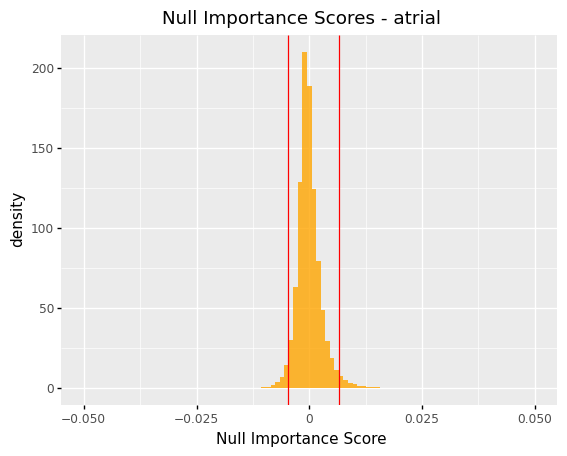

<ggplot: (8777274948666)>

cfmature
0
2000
4000
Number of scores in null distribution -  cfmature : 4763000


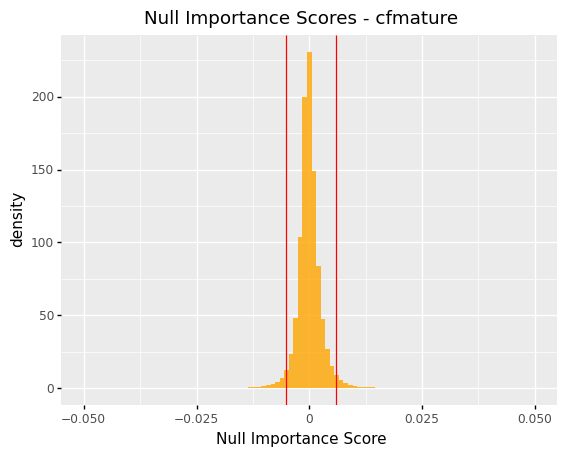

<ggplot: (8771249152073)>

cfwk8
0
2000
4000
6000
Number of scores in null distribution -  cfwk8 : 6501000


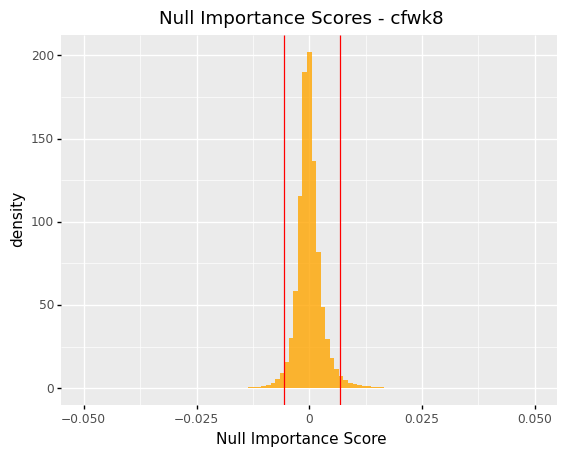

<ggplot: (8770733015059)>

epiicardium
0
2000
Number of scores in null distribution -  epiicardium : 3380000


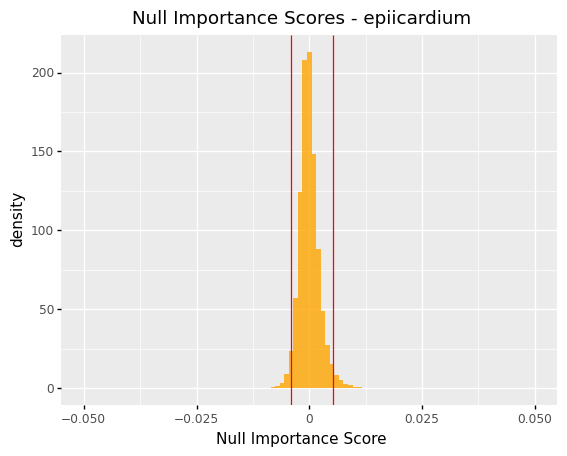

<ggplot: (8777315590178)>

myocardium
0
2000
4000
Number of scores in null distribution -  myocardium : 4170000


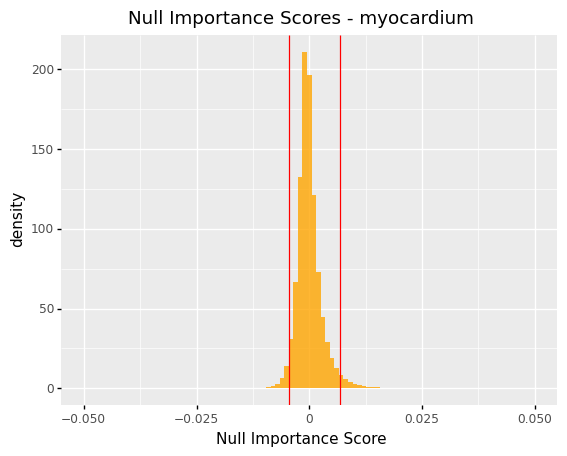

<ggplot: (8777028998111)>

smcwk19
0
2000
Number of scores in null distribution -  smcwk19 : 2930000


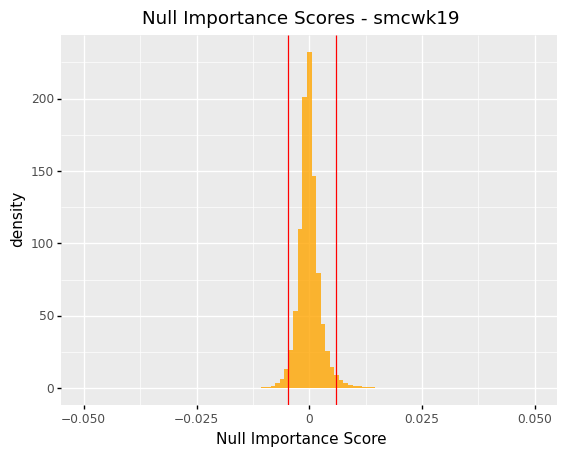

<ggplot: (8771249166135)>

smcwk8
0
Number of scores in null distribution -  smcwk8 : 1234000


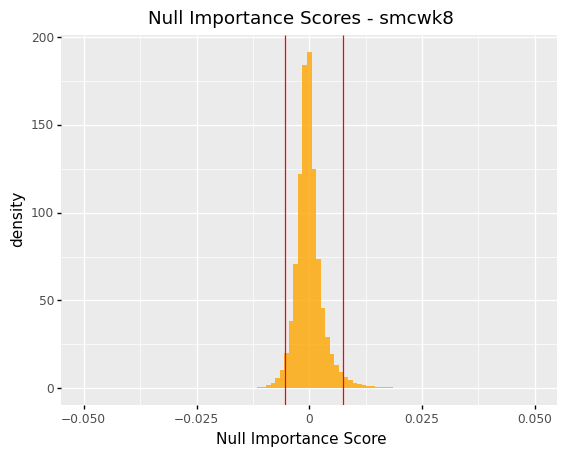

<ggplot: (8771249187810)>

valvelate
0
2000
4000
Number of scores in null distribution -  valvelate : 4119000


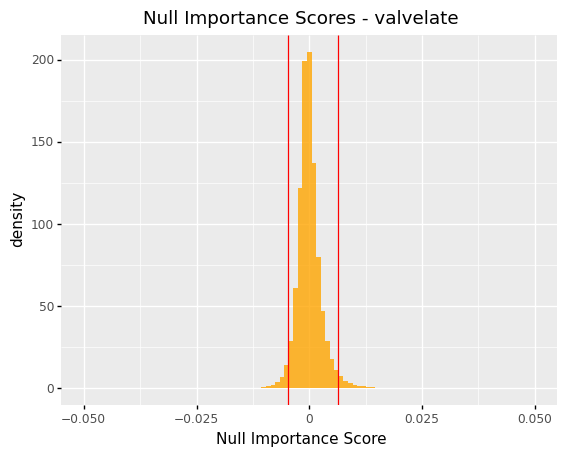

<ggplot: (8771249181091)>

ventricular
0
2000
4000
6000
8000
Number of scores in null distribution -  ventricular : 8377000


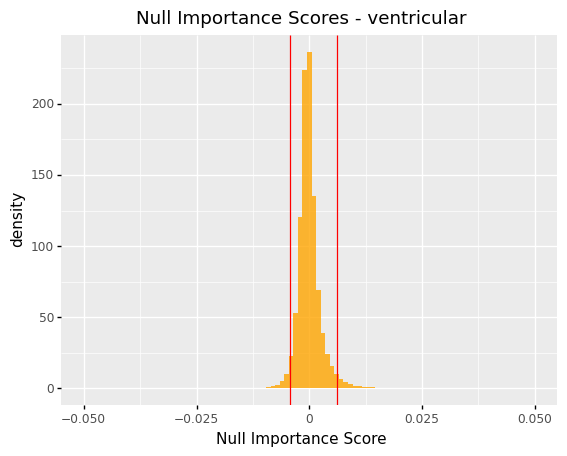

<ggplot: (8777028998033)>

arteries
0
2000
Number of scores in null distribution -  arteries : 3593000


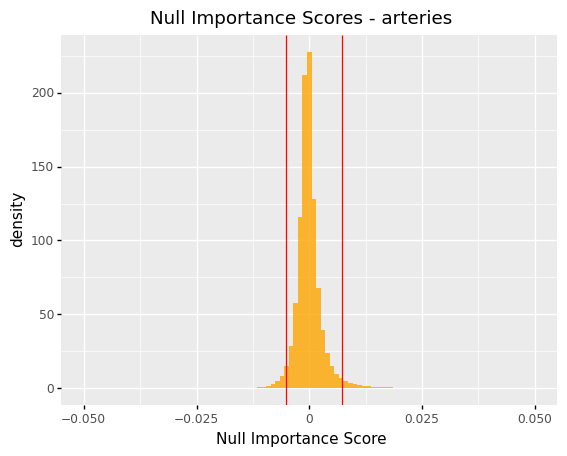

<ggplot: (8771249166318)>

capillary
0
2000
4000
Number of scores in null distribution -  capillary : 4742000


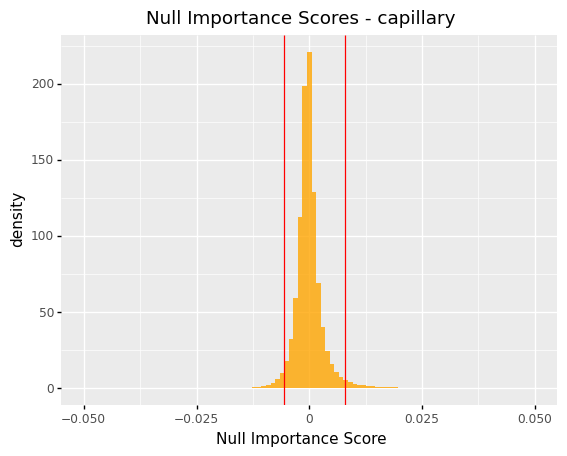

<ggplot: (8770671688289)>

cfwk6
0
Number of scores in null distribution -  cfwk6 : 1869000


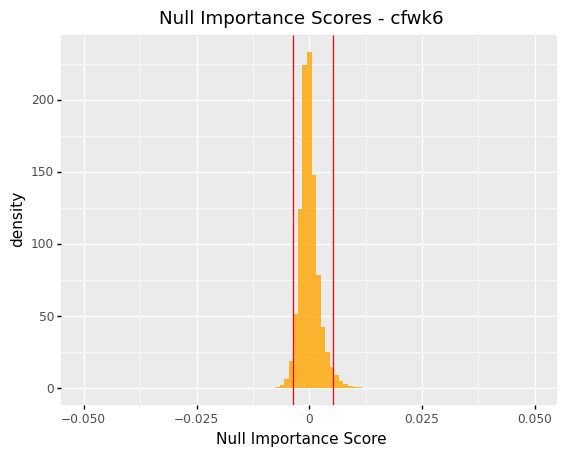

<ggplot: (8770733173429)>

endocardium
0
2000
4000
6000
Number of scores in null distribution -  endocardium : 6941000


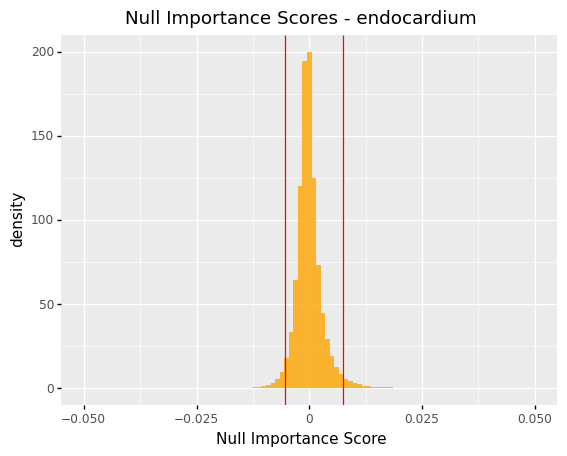

<ggplot: (8771249177233)>

lymphec
0
2000
Number of scores in null distribution -  lymphec : 2227000


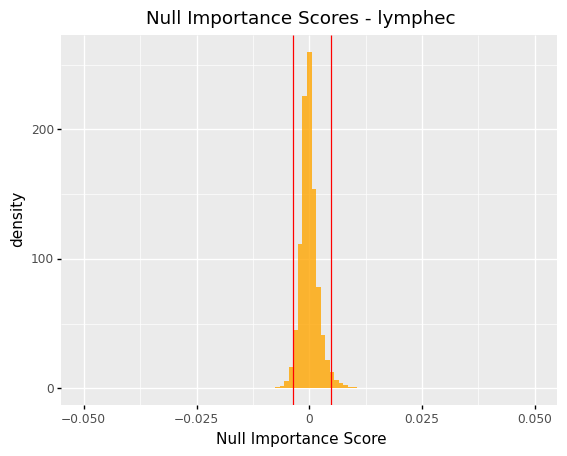

<ggplot: (8771249187822)>

neuralcrest
0
Number of scores in null distribution -  neuralcrest : 1686000


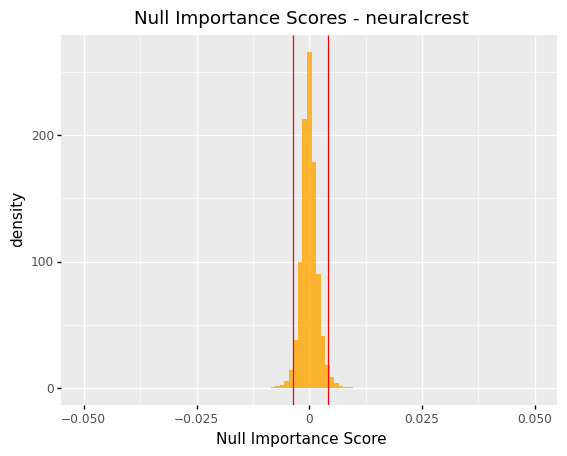

<ggplot: (8770733015173)>

pericytes
0
2000
Number of scores in null distribution -  pericytes : 2839000


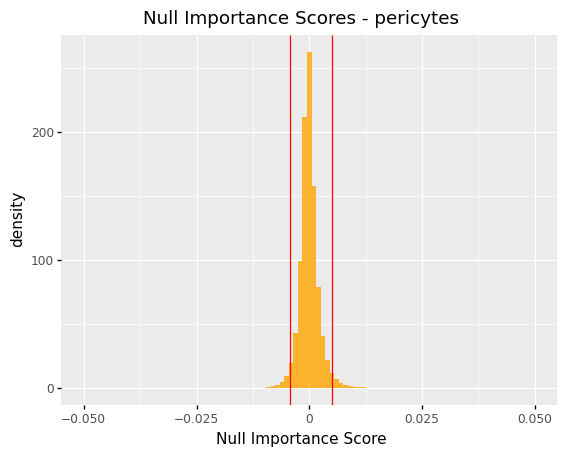

<ggplot: (8770733025073)>

smcwk6
0
Number of scores in null distribution -  smcwk6 : 1816000


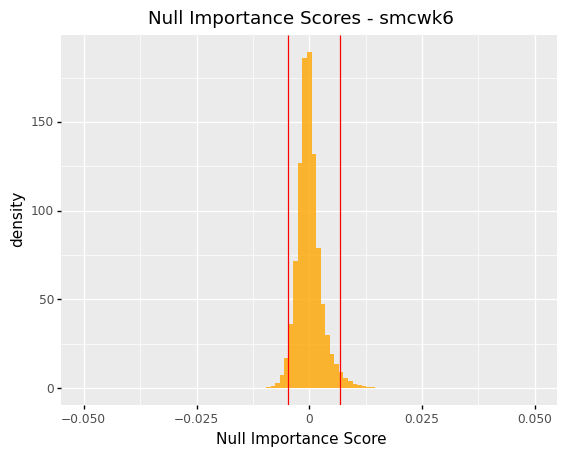

<ggplot: (8771249166090)>

valveearly
0
2000
Number of scores in null distribution -  valveearly : 2746000


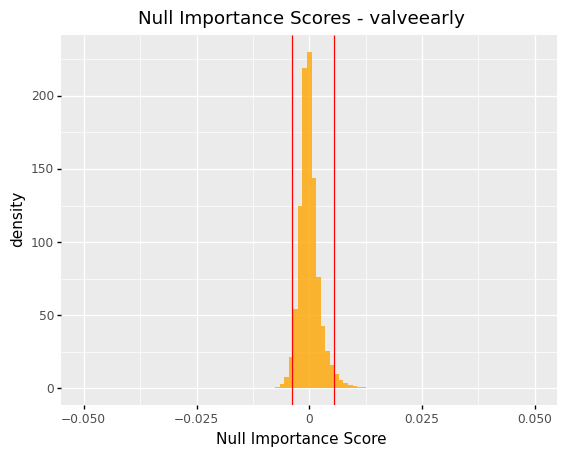

<ggplot: (8771249186058)>

veins
0
2000
Number of scores in null distribution -  veins : 2204000


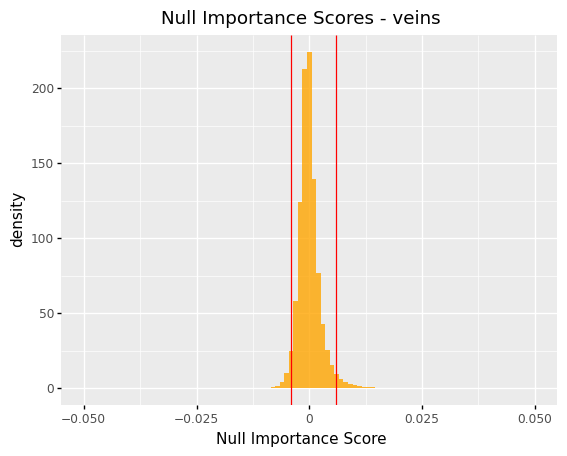

<ggplot: (8771249177790)>

all
0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
Number of scores in null distribution -  all : 23170000


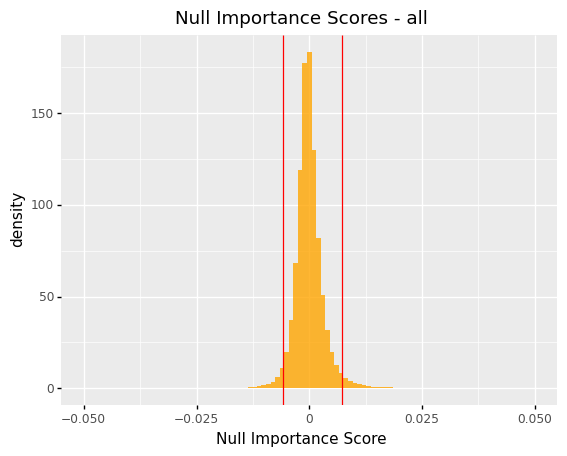

<ggplot: (8771249114826)>

In [26]:
null_bp_scores = {'atrial': [], 'cfmature': [], 'cfwk8': [], 'epiicardium': [],
                  'myocardium': [], 'smcwk19': [], 'smcwk8': [], 'valvelate': [], 'ventricular': [],
                  'arteries': [], 'capillary': [], 'cfwk6': [], 'endocardium': [], 'lymphec': [],
                  'neuralcrest': [], 'pericytes': [], 'smcwk6': [], 'valveearly': [], 'veins': [], 'all': []}

for cluster in null_bp_scores:
    print(cluster)
    bp_scores = []
    scores = null_dict[cluster].tolist()
    for index, peak in enumerate(scores):
        if index % 2000 == 0:
            print(index)
        for ind, pos in enumerate(peak):
            bp_scores.append(sum(pos))
    null_bp_scores[cluster] = bp_scores
    
    print('Number of scores in null distribution - ', cluster, ':', str(len(null_bp_scores[cluster])))

    null_df = pd.DataFrame(random.sample(bp_scores, 1000000), columns=['null_score'])
    null_quantiles = list(null_df['null_score'].quantile([0.025, 0.975]))

    display(ggplot(data=null_df, mapping=aes(x='null_score'))       
            + geom_histogram(mapping=aes(y='stat(density)'), fill='#ffa500', alpha=0.8, bins=100)
            + labs(title='Null Importance Scores - ' + cluster, x='Null Importance Score')
            + geom_vline(mapping=aes(xintercept=null_quantiles[0]), color='red')
            + geom_vline(mapping=aes(xintercept=null_quantiles[1]), color='red')
            + xlim(-0.05,0.05))

## Save and Load Null Scores

In [6]:
# Save Tables

for cluster in null_bp_scores:
    print(cluster)
    with open(bed_dir + '/' + cluster + '.per_base.null.scores.pkl', 'wb') as outfile:
        pickle.dump(null_bp_scores[cluster], outfile)
    
# Load Tables

null_bp_scores = {'atrial': [], 'cfmature': [], 'cfwk8': [], 'epiicardium': [],
                  'myocardium': [], 'smcwk19': [], 'smcwk8': [], 'valvelate': [], 'ventricular': [],
                  'arteries': [], 'capillary': [], 'cfwk6': [], 'endocardium': [], 'lymphec': [],
                  'neuralcrest': [], 'pericytes': [], 'smcwk6': [], 'valveearly': [], 'veins': [], 'all': []}

for cluster in null_bp_scores:
    print(cluster)
    with open(bed_dir + '/' + cluster + '.per_base.null.scores.pkl', 'rb') as infile:
        null_bp_scores[cluster] = pickle.load(infile)

atrial
cfmature
cfwk8
epiicardium
myocardium
smcwk19
smcwk8
valvelate
ventricular
arteries
capillary
cfwk6
endocardium
lymphec
neuralcrest
pericytes
smcwk6
valveearly
veins
all


## Get Deepshap scores for motifs

In [30]:
motif_score_dict = {'atrial': [], 'cfmature': [], 'cfwk8': [], 'epiicardium': [],
                    'myocardium': [], 'smcwk19': [], 'smcwk8': [], 'valvelate': [], 'ventricular': [],
                    'arteries': [], 'capillary': [], 'cfwk6': [], 'endocardium': [], 'lymphec': [],
                    'neuralcrest': [], 'pericytes': [], 'smcwk6': [], 'valveearly': [], 'veins': [], 'all': []}

for cluster in motif_score_dict:
    
    print()
    print(cluster)

    def motif_sum_func(row, cluster):
        motif_scores = [sum(x) for x in score_dict[cluster][row['peak_index']][row['start_index']:row['end_index']]]
        return sum(motif_scores)

    def motif_mean_func(row, cluster):
        motif_scores = [sum(x) for x in score_dict[cluster][row['peak_index']][row['start_index']:row['end_index']]]
        return np.mean(motif_scores)

    def main_func(df):
        df['start_index'] = df['start'] - df['peak_start']
        df['end_index'] = df['end'] - df['peak_start']
        df[cluster + '_motif_sum'] = df.apply(lambda row : motif_sum_func(row, cluster), axis=1)
        df[cluster + '_motif_mean'] = df.apply(lambda row : motif_mean_func(row, cluster), axis=1)
        return df

    def parallel_dataframe(df, func, n_cores=50):
        df_split = np.array_split(df, n_cores)
        pool = Pool(n_cores)
        df = pd.concat(pool.map(func, df_split))
        pool.close()
        pool.join()
        return df

    motif_score_dict[cluster] = parallel_dataframe(merged_dict[cluster], main_func)

    display(motif_score_dict[cluster].head())
    display(motif_score_dict[cluster].shape)


atrial


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,atrial_motif_sum,atrial_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827039,828039,0,chr1_827039_828039,269,278,0.003554,0.000395
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827039,828039,0,chr1_827039_828039,291,310,0.098977,0.005209
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827039,828039,0,chr1_827039_828039,293,303,0.062240,0.006224
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827039,828039,0,chr1_827039_828039,294,303,0.060157,0.006684
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827039,828039,0,chr1_827039_828039,294,304,0.074192,0.007419


(5194212, 17)


cfmature


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,cfmature_motif_sum,cfmature_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,826987,827987,0,chr1_826987_827987,321,330,0.019110,0.002123
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,826987,827987,0,chr1_826987_827987,343,362,0.081647,0.004297
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,826987,827987,0,chr1_826987_827987,345,355,0.058079,0.005808
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,826987,827987,0,chr1_826987_827987,346,355,0.057333,0.006370
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,826987,827987,0,chr1_826987_827987,346,356,0.060334,0.006033


(4040629, 17)


cfwk8


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,cfwk8_motif_sum,cfwk8_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827014,828014,0,chr1_827014_828014,294,303,0.015714,0.001746
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827014,828014,0,chr1_827014_828014,316,335,0.148153,0.007798
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827014,828014,0,chr1_827014_828014,318,328,0.110597,0.011060
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827014,828014,0,chr1_827014_828014,319,328,0.106957,0.011884
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827014,828014,0,chr1_827014_828014,319,329,0.114000,0.011400


(5151028, 17)


epiicardium


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,epiicardium_motif_sum,epiicardium_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827078,828078,0,chr1_827078_828078,230,239,0.004012,0.000446
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827078,828078,0,chr1_827078_828078,252,271,0.050391,0.002652
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827078,828078,0,chr1_827078_828078,254,264,0.031808,0.003181
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827078,828078,0,chr1_827078_828078,255,264,0.031486,0.003498
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827078,828078,0,chr1_827078_828078,255,265,0.036059,0.003606


(3201069, 17)


myocardium


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,myocardium_motif_sum,myocardium_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827026,828026,0,chr1_827026_828026,282,291,-0.009816,-0.001091
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827026,828026,0,chr1_827026_828026,304,323,0.059873,0.003151
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827026,828026,0,chr1_827026_828026,306,316,0.035361,0.003536
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827026,828026,0,chr1_827026_828026,307,316,0.034035,0.003782
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827026,828026,0,chr1_827026_828026,307,317,0.037672,0.003767


(3687446, 17)


smcwk19


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,smcwk19_motif_sum,smcwk19_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827003,828003,0,chr1_827003_828003,305,314,-0.023944,-0.002660
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827003,828003,0,chr1_827003_828003,327,346,0.065297,0.003437
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827003,828003,0,chr1_827003_828003,329,339,0.049426,0.004943
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827003,828003,0,chr1_827003_828003,330,339,0.047854,0.005317
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827003,828003,0,chr1_827003_828003,330,340,0.056144,0.005614


(3166436, 17)


smcwk8


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,smcwk8_motif_sum,smcwk8_motif_mean
0,chr1,1000360,1000374,CTCF_177,177,15,+,8.305337,chr1,1000312,1001312,0,chr1_1000312_1001312,48,62,0.008035,0.000574
1,chr1,1000361,1000373,PATZ1_172,172,13,+,9.051874,chr1,1000312,1001312,0,chr1_1000312_1001312,49,61,0.009029,0.000752
2,chr1,1000361,1000375,CTCFL_198,198,15,+,9.864683,chr1,1000312,1001312,0,chr1_1000312_1001312,49,63,0.007296,0.000521
3,chr1,1000362,1000382,ZNF263_159,159,21,+,8.014804,chr1,1000312,1001312,0,chr1_1000312_1001312,50,70,-0.001241,-0.000062
4,chr1,1000376,1000389,PLAG1_264,264,14,+,8.451848,chr1,1000312,1001312,0,chr1_1000312_1001312,64,77,-0.007708,-0.000593


(1410401, 17)


valvelate


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,valvelate_motif_sum,valvelate_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827037,828037,0,chr1_827037_828037,271,280,0.006790,0.000754
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827037,828037,0,chr1_827037_828037,293,312,0.050008,0.002632
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827037,828037,0,chr1_827037_828037,295,305,0.040812,0.004081
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827037,828037,0,chr1_827037_828037,296,305,0.041292,0.004588
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827037,828037,0,chr1_827037_828037,296,306,0.044615,0.004461


(3934856, 17)


ventricular


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,ventricular_motif_sum,ventricular_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827057,828057,0,chr1_827057_828057,251,260,-0.006125,-0.000681
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827057,828057,0,chr1_827057_828057,273,292,0.049875,0.002625
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827057,828057,0,chr1_827057_828057,275,285,0.035109,0.003511
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827057,828057,0,chr1_827057_828057,276,285,0.036462,0.004051
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827057,828057,0,chr1_827057_828057,276,286,0.039073,0.003907


(6582288, 17)


arteries


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,arteries_motif_sum,arteries_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827020,828020,0,chr1_827020_828020,288,297,0.002624,0.000292
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827020,828020,0,chr1_827020_828020,310,329,0.142972,0.007525
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827020,828020,0,chr1_827020_828020,312,322,0.106322,0.010632
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827020,828020,0,chr1_827020_828020,313,322,0.106766,0.011863
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827020,828020,0,chr1_827020_828020,313,323,0.116478,0.011648


(3610588, 17)


capillary


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,capillary_motif_sum,capillary_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827040,828040,0,chr1_827040_828040,268,277,-0.001777,-0.000197
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827040,828040,0,chr1_827040_828040,290,309,0.182374,0.009599
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827040,828040,0,chr1_827040_828040,292,302,0.154682,0.015468
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827040,828040,0,chr1_827040_828040,293,302,0.154919,0.017213
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827040,828040,0,chr1_827040_828040,293,303,0.167886,0.016789


(4385914, 17)


cfwk6


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,cfwk6_motif_sum,cfwk6_motif_mean
0,chr1,924845,924861,PURA_813,813,17,+,8.859026,chr1,924334,925334,0,chr1_924334_925334,511,527,0.003849,0.000241
1,chr1,924853,924874,REST_168,168,22,+,6.509521,chr1,924334,925334,0,chr1_924334_925334,519,540,0.019849,0.000945
2,chr1,924858,924867,DNMT1_301,301,10,+,5.048222,chr1,924334,925334,0,chr1_924334_925334,524,533,0.003238,0.000360
3,chr1,924899,924913,ZBTB33_255,255,15,+,8.345198,chr1,924334,925334,0,chr1_924334_925334,565,579,0.031788,0.002271
4,chr1,924909,924919,SMAD2_745,745,11,-,8.215955,chr1,924334,925334,0,chr1_924334_925334,575,585,0.005555,0.000555


(1830770, 17)


endocardium


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,endocardium_motif_sum,endocardium_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827042,828042,0,chr1_827042_828042,266,275,-0.005037,-0.000560
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827042,828042,0,chr1_827042_828042,288,307,0.145584,0.007662
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827042,828042,0,chr1_827042_828042,290,300,0.119874,0.011987
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827042,828042,0,chr1_827042_828042,291,300,0.119031,0.013226
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827042,828042,0,chr1_827042_828042,291,301,0.128638,0.012864


(6199971, 17)


lymphec


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,lymphec_motif_sum,lymphec_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827030,828030,0,chr1_827030_828030,278,287,0.002527,0.000281
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827030,828030,0,chr1_827030_828030,300,319,0.062849,0.003308
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827030,828030,0,chr1_827030_828030,302,312,0.046328,0.004633
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827030,828030,0,chr1_827030_828030,303,312,0.046609,0.005179
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827030,828030,0,chr1_827030_828030,303,313,0.052910,0.005291


(2428983, 17)


neuralcrest


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,neuralcrest_motif_sum,neuralcrest_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,826952,827952,0,chr1_826952_827952,356,365,0.000164,0.000018
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,826952,827952,0,chr1_826952_827952,378,397,0.015452,0.000813
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,826952,827952,0,chr1_826952_827952,380,390,0.011657,0.001166
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,826952,827952,0,chr1_826952_827952,381,390,0.010691,0.001188
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,826952,827952,0,chr1_826952_827952,381,391,0.013696,0.001370


(1834710, 17)


pericytes


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,pericytes_motif_sum,pericytes_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,826715,827715,0,chr1_826715_827715,593,602,0.010233,0.001137
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,826715,827715,0,chr1_826715_827715,615,634,0.079647,0.004192
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,826715,827715,0,chr1_826715_827715,617,627,0.058004,0.005800
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,826715,827715,0,chr1_826715_827715,618,627,0.058616,0.006513
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,826715,827715,0,chr1_826715_827715,618,628,0.059931,0.005993


(2890534, 17)


smcwk6


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,smcwk6_motif_sum,smcwk6_motif_mean
0,chr1,920999,921008,BARHL2_484,484,10,+,7.572536,chr1,920710,921710,0,chr1_920710_921710,289,298,0.000270,0.000030
1,chr1,921007,921018,PBX1_555,555,12,-,10.434060,chr1,920710,921710,0,chr1_920710_921710,297,308,0.003986,0.000362
2,chr1,921007,921020,HOXC8_399,399,14,-,8.506036,chr1,920710,921710,0,chr1_920710_921710,297,310,0.001053,0.000081
3,chr1,921008,921017,HOXB7_446,446,10,-,10.754610,chr1,920710,921710,0,chr1_920710_921710,298,307,0.004424,0.000492
4,chr1,921008,921018,HOXB8_444,444,11,-,10.673433,chr1,920710,921710,0,chr1_920710_921710,298,308,0.004615,0.000461


(1810717, 17)


valveearly


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,valveearly_motif_sum,valveearly_motif_mean
0,chr1,909931,909945,ELF2_326,326,15,+,8.137439,chr1,909624,910624,0,chr1_909624_910624,307,321,-0.002785,-0.000199
1,chr1,909931,909951,ZNF263_159,159,21,+,8.915564,chr1,909624,910624,0,chr1_909624_910624,307,327,-0.011037,-0.000552
2,chr1,909935,909955,ZNF263_159,159,21,+,7.749616,chr1,909624,910624,0,chr1_909624_910624,311,331,-0.016127,-0.000806
3,chr1,909945,909955,KLF1_179,179,11,+,8.726345,chr1,909624,910624,0,chr1_909624_910624,321,331,-0.012559,-0.001256
4,chr1,909952,909965,TFAP2D_2,2,14,-,7.572060,chr1,909624,910624,0,chr1_909624_910624,328,341,-0.007136,-0.000549


(2675766, 17)


veins


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,veins_motif_sum,veins_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827101,828101,0,chr1_827101_828101,207,216,-0.012620,-0.001402
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827101,828101,0,chr1_827101_828101,229,248,0.060551,0.003187
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827101,828101,0,chr1_827101_828101,231,241,0.049191,0.004919
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827101,828101,0,chr1_827101_828101,232,241,0.050010,0.005557
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827101,828101,0,chr1_827101_828101,232,242,0.054500,0.005450


(2302137, 17)


all


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,all_motif_sum,all_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827078,828078,0,chr1_827078_828078,230,239,0.015216,0.001691
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827078,828078,0,chr1_827078_828078,252,271,0.101747,0.005355
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827078,828078,0,chr1_827078_828078,254,264,0.079190,0.007919
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827078,828078,0,chr1_827078_828078,255,264,0.076244,0.008472
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827078,828078,0,chr1_827078_828078,255,265,0.078394,0.007839


(14392500, 17)

## Save and Load Motif Scores

In [7]:
# Save Tables

for cluster in motif_score_dict:

    print()
    print(cluster)
    
    motif_score_dict[cluster].to_pickle(bed_dir + '/' + cluster + '.motif_scores.pkl')

# Load Tables

motif_score_dict = {'atrial': [], 'cfmature': [], 'cfwk8': [], 'epiicardium': [],
                    'myocardium': [], 'smcwk19': [], 'smcwk8': [], 'valvelate': [], 'ventricular': [],
                    'arteries': [], 'capillary': [], 'cfwk6': [], 'endocardium': [], 'lymphec': [],
                    'neuralcrest': [], 'pericytes': [], 'smcwk6': [], 'valveearly': [], 'veins': [], 'all': []}

for cluster in motif_score_dict:

    print()
    print(cluster)

    motif_score_dict[cluster] = pd.read_pickle(bed_dir + '/' + cluster + '.motif_scores.pkl')
    
    display(motif_score_dict[cluster].head())
    display(motif_score_dict[cluster].shape)


atrial


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,atrial_motif_sum,atrial_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827039,828039,0,chr1_827039_828039,269,278,0.003554,0.000395
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827039,828039,0,chr1_827039_828039,291,310,0.098977,0.005209
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827039,828039,0,chr1_827039_828039,293,303,0.062240,0.006224
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827039,828039,0,chr1_827039_828039,294,303,0.060157,0.006684
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827039,828039,0,chr1_827039_828039,294,304,0.074192,0.007419


(5194212, 17)


cfmature


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,cfmature_motif_sum,cfmature_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,826987,827987,0,chr1_826987_827987,321,330,0.019110,0.002123
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,826987,827987,0,chr1_826987_827987,343,362,0.081647,0.004297
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,826987,827987,0,chr1_826987_827987,345,355,0.058079,0.005808
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,826987,827987,0,chr1_826987_827987,346,355,0.057333,0.006370
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,826987,827987,0,chr1_826987_827987,346,356,0.060334,0.006033


(4040629, 17)


cfwk8


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,cfwk8_motif_sum,cfwk8_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827014,828014,0,chr1_827014_828014,294,303,0.015714,0.001746
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827014,828014,0,chr1_827014_828014,316,335,0.148153,0.007798
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827014,828014,0,chr1_827014_828014,318,328,0.110597,0.011060
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827014,828014,0,chr1_827014_828014,319,328,0.106957,0.011884
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827014,828014,0,chr1_827014_828014,319,329,0.114000,0.011400


(5151028, 17)


epiicardium


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,epiicardium_motif_sum,epiicardium_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827078,828078,0,chr1_827078_828078,230,239,0.004012,0.000446
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827078,828078,0,chr1_827078_828078,252,271,0.050391,0.002652
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827078,828078,0,chr1_827078_828078,254,264,0.031808,0.003181
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827078,828078,0,chr1_827078_828078,255,264,0.031486,0.003498
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827078,828078,0,chr1_827078_828078,255,265,0.036059,0.003606


(3201069, 17)


myocardium


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,myocardium_motif_sum,myocardium_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827026,828026,0,chr1_827026_828026,282,291,-0.009816,-0.001091
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827026,828026,0,chr1_827026_828026,304,323,0.059873,0.003151
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827026,828026,0,chr1_827026_828026,306,316,0.035361,0.003536
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827026,828026,0,chr1_827026_828026,307,316,0.034035,0.003782
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827026,828026,0,chr1_827026_828026,307,317,0.037672,0.003767


(3687446, 17)


smcwk19


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,smcwk19_motif_sum,smcwk19_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827003,828003,0,chr1_827003_828003,305,314,-0.023944,-0.002660
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827003,828003,0,chr1_827003_828003,327,346,0.065297,0.003437
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827003,828003,0,chr1_827003_828003,329,339,0.049426,0.004943
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827003,828003,0,chr1_827003_828003,330,339,0.047854,0.005317
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827003,828003,0,chr1_827003_828003,330,340,0.056144,0.005614


(3166436, 17)


smcwk8


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,smcwk8_motif_sum,smcwk8_motif_mean
0,chr1,1000360,1000374,CTCF_177,177,15,+,8.305337,chr1,1000312,1001312,0,chr1_1000312_1001312,48,62,0.008035,0.000574
1,chr1,1000361,1000373,PATZ1_172,172,13,+,9.051874,chr1,1000312,1001312,0,chr1_1000312_1001312,49,61,0.009029,0.000752
2,chr1,1000361,1000375,CTCFL_198,198,15,+,9.864683,chr1,1000312,1001312,0,chr1_1000312_1001312,49,63,0.007296,0.000521
3,chr1,1000362,1000382,ZNF263_159,159,21,+,8.014804,chr1,1000312,1001312,0,chr1_1000312_1001312,50,70,-0.001241,-0.000062
4,chr1,1000376,1000389,PLAG1_264,264,14,+,8.451848,chr1,1000312,1001312,0,chr1_1000312_1001312,64,77,-0.007708,-0.000593


(1410401, 17)


valvelate


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,valvelate_motif_sum,valvelate_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827037,828037,0,chr1_827037_828037,271,280,0.006790,0.000754
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827037,828037,0,chr1_827037_828037,293,312,0.050008,0.002632
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827037,828037,0,chr1_827037_828037,295,305,0.040812,0.004081
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827037,828037,0,chr1_827037_828037,296,305,0.041292,0.004588
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827037,828037,0,chr1_827037_828037,296,306,0.044615,0.004461


(3934856, 17)


ventricular


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,ventricular_motif_sum,ventricular_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827057,828057,0,chr1_827057_828057,251,260,-0.006125,-0.000681
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827057,828057,0,chr1_827057_828057,273,292,0.049875,0.002625
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827057,828057,0,chr1_827057_828057,275,285,0.035109,0.003511
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827057,828057,0,chr1_827057_828057,276,285,0.036462,0.004051
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827057,828057,0,chr1_827057_828057,276,286,0.039073,0.003907


(6582288, 17)


arteries


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,arteries_motif_sum,arteries_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827020,828020,0,chr1_827020_828020,288,297,0.002624,0.000292
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827020,828020,0,chr1_827020_828020,310,329,0.142972,0.007525
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827020,828020,0,chr1_827020_828020,312,322,0.106322,0.010632
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827020,828020,0,chr1_827020_828020,313,322,0.106766,0.011863
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827020,828020,0,chr1_827020_828020,313,323,0.116478,0.011648


(3610588, 17)


capillary


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,capillary_motif_sum,capillary_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827040,828040,0,chr1_827040_828040,268,277,-0.001777,-0.000197
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827040,828040,0,chr1_827040_828040,290,309,0.182374,0.009599
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827040,828040,0,chr1_827040_828040,292,302,0.154682,0.015468
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827040,828040,0,chr1_827040_828040,293,302,0.154919,0.017213
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827040,828040,0,chr1_827040_828040,293,303,0.167886,0.016789


(4385914, 17)


cfwk6


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,cfwk6_motif_sum,cfwk6_motif_mean
0,chr1,924845,924861,PURA_813,813,17,+,8.859026,chr1,924334,925334,0,chr1_924334_925334,511,527,0.003849,0.000241
1,chr1,924853,924874,REST_168,168,22,+,6.509521,chr1,924334,925334,0,chr1_924334_925334,519,540,0.019849,0.000945
2,chr1,924858,924867,DNMT1_301,301,10,+,5.048222,chr1,924334,925334,0,chr1_924334_925334,524,533,0.003238,0.000360
3,chr1,924899,924913,ZBTB33_255,255,15,+,8.345198,chr1,924334,925334,0,chr1_924334_925334,565,579,0.031788,0.002271
4,chr1,924909,924919,SMAD2_745,745,11,-,8.215955,chr1,924334,925334,0,chr1_924334_925334,575,585,0.005555,0.000555


(1830770, 17)


endocardium


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,endocardium_motif_sum,endocardium_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827042,828042,0,chr1_827042_828042,266,275,-0.005037,-0.000560
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827042,828042,0,chr1_827042_828042,288,307,0.145584,0.007662
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827042,828042,0,chr1_827042_828042,290,300,0.119874,0.011987
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827042,828042,0,chr1_827042_828042,291,300,0.119031,0.013226
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827042,828042,0,chr1_827042_828042,291,301,0.128638,0.012864


(6199971, 17)


lymphec


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,lymphec_motif_sum,lymphec_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827030,828030,0,chr1_827030_828030,278,287,0.002527,0.000281
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827030,828030,0,chr1_827030_828030,300,319,0.062849,0.003308
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827030,828030,0,chr1_827030_828030,302,312,0.046328,0.004633
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827030,828030,0,chr1_827030_828030,303,312,0.046609,0.005179
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827030,828030,0,chr1_827030_828030,303,313,0.052910,0.005291


(2428983, 17)


neuralcrest


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,neuralcrest_motif_sum,neuralcrest_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,826952,827952,0,chr1_826952_827952,356,365,0.000164,0.000018
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,826952,827952,0,chr1_826952_827952,378,397,0.015452,0.000813
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,826952,827952,0,chr1_826952_827952,380,390,0.011657,0.001166
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,826952,827952,0,chr1_826952_827952,381,390,0.010691,0.001188
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,826952,827952,0,chr1_826952_827952,381,391,0.013696,0.001370


(1834710, 17)


pericytes


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,pericytes_motif_sum,pericytes_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,826715,827715,0,chr1_826715_827715,593,602,0.010233,0.001137
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,826715,827715,0,chr1_826715_827715,615,634,0.079647,0.004192
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,826715,827715,0,chr1_826715_827715,617,627,0.058004,0.005800
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,826715,827715,0,chr1_826715_827715,618,627,0.058616,0.006513
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,826715,827715,0,chr1_826715_827715,618,628,0.059931,0.005993


(2890534, 17)


smcwk6


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,smcwk6_motif_sum,smcwk6_motif_mean
0,chr1,920999,921008,BARHL2_484,484,10,+,7.572536,chr1,920710,921710,0,chr1_920710_921710,289,298,0.000270,0.000030
1,chr1,921007,921018,PBX1_555,555,12,-,10.434060,chr1,920710,921710,0,chr1_920710_921710,297,308,0.003986,0.000362
2,chr1,921007,921020,HOXC8_399,399,14,-,8.506036,chr1,920710,921710,0,chr1_920710_921710,297,310,0.001053,0.000081
3,chr1,921008,921017,HOXB7_446,446,10,-,10.754610,chr1,920710,921710,0,chr1_920710_921710,298,307,0.004424,0.000492
4,chr1,921008,921018,HOXB8_444,444,11,-,10.673433,chr1,920710,921710,0,chr1_920710_921710,298,308,0.004615,0.000461


(1810717, 17)


valveearly


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,valveearly_motif_sum,valveearly_motif_mean
0,chr1,909931,909945,ELF2_326,326,15,+,8.137439,chr1,909624,910624,0,chr1_909624_910624,307,321,-0.002785,-0.000199
1,chr1,909931,909951,ZNF263_159,159,21,+,8.915564,chr1,909624,910624,0,chr1_909624_910624,307,327,-0.011037,-0.000552
2,chr1,909935,909955,ZNF263_159,159,21,+,7.749616,chr1,909624,910624,0,chr1_909624_910624,311,331,-0.016127,-0.000806
3,chr1,909945,909955,KLF1_179,179,11,+,8.726345,chr1,909624,910624,0,chr1_909624_910624,321,331,-0.012559,-0.001256
4,chr1,909952,909965,TFAP2D_2,2,14,-,7.572060,chr1,909624,910624,0,chr1_909624_910624,328,341,-0.007136,-0.000549


(2675766, 17)


veins


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,veins_motif_sum,veins_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827101,828101,0,chr1_827101_828101,207,216,-0.012620,-0.001402
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827101,828101,0,chr1_827101_828101,229,248,0.060551,0.003187
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827101,828101,0,chr1_827101_828101,231,241,0.049191,0.004919
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827101,828101,0,chr1_827101_828101,232,241,0.050010,0.005557
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827101,828101,0,chr1_827101_828101,232,242,0.054500,0.005450


(2302137, 17)


all


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,all_motif_sum,all_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827078,828078,0,chr1_827078_828078,230,239,0.015216,0.001691
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827078,828078,0,chr1_827078_828078,252,271,0.101747,0.005355
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827078,828078,0,chr1_827078_828078,254,264,0.079190,0.007919
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827078,828078,0,chr1_827078_828078,255,264,0.076244,0.008472
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827078,828078,0,chr1_827078_828078,255,265,0.078394,0.007839


(14392500, 17)

## Get Active Motifs Table

In [8]:
active_motifs = {'atrial': [], 'cfmature': [], 'cfwk8': [], 'epiicardium': [],
                 'myocardium': [], 'smcwk19': [], 'smcwk8': [], 'valvelate': [], 'ventricular': [],
                 'arteries': [], 'capillary': [], 'cfwk6': [], 'endocardium': [], 'lymphec': [],
                 'neuralcrest': [], 'pericytes': [], 'smcwk6': [], 'valveearly': [], 'veins': [], 'all': []}

active_thresh = 0.95

print('Active Threshold:', active_thresh)

for cluster in active_motifs:
    print(cluster)
    active_motifs[cluster] = motif_score_dict[cluster].loc[(motif_score_dict[cluster][cluster + '_motif_mean'] >= np.quantile(null_bp_scores[cluster], active_thresh)) | 
                                              (motif_score_dict[cluster][cluster + '_motif_mean'] <= np.quantile(null_bp_scores[cluster], 1 - active_thresh))].reset_index(drop=True).copy()
    print(np.quantile(null_bp_scores[cluster], active_thresh))
    print(np.quantile(null_bp_scores[cluster], 1 - active_thresh))
    
display(active_motifs['atrial'].head(20))
display(active_motifs['atrial'].shape)

Active Threshold: 0.9
atrial
0.0032028836664831045
-0.0028287655445710697
cfmature
0.0028651569021740228
-0.0026302636190266636
cfwk8
0.003207337200583425
-0.002965469419359579
epiicardium
0.0027484134932819876
-0.002492839678896417
myocardium
0.003265892011942924
-0.0028075132568446863
smcwk19
0.0027983389390192313
-0.0026384803289693083
smcwk8
0.0034726001047893085
-0.003213360139684483
valvelate
0.0030843080321865273
-0.002791552919778042
ventricular
0.0027670202476620044
-0.002482409527685377
arteries
0.0029468287500567392
-0.0028341060063103215
capillary
0.003127617549681418
-0.0030616917303841547
cfwk6
0.002598809377188446
-0.002308724488791996
endocardium
0.003352246027825459
-0.0030777923713394563
lymphec
0.0023933982960079453
-0.0021623693502879184
neuralcrest
0.002214145870209905
-0.0020652937234917775
pericytes
0.0024641316208944787
-0.0022974074349040173
smcwk6
0.0033206027211563206
-0.002998050584221347
valveearly
0.0027117406529796424
-0.0023946670871737297
veins
0.002796

,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,atrial_motif_sum,atrial_motif_mean
0,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827039,828039,0,chr1_827039_828039,291,310,0.098977,0.005209
1,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827039,828039,0,chr1_827039_828039,293,303,0.062240,0.006224
2,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827039,828039,0,chr1_827039_828039,294,303,0.060157,0.006684
3,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827039,828039,0,chr1_827039_828039,294,304,0.074192,0.007419
4,chr1,827337,827354,AHRR_17,17,18,-,6.501711,chr1,827039,828039,0,chr1_827039_828039,298,315,0.054949,0.003232
5,chr1,827337,827354,AHR_28,28,18,-,6.501711,chr1,827039,828039,0,chr1_827039_828039,298,315,0.054949,0.003232
6,chr1,827503,827511,RHOXF1_409,409,9,+,8.909353,chr1,827039,828039,0,chr1_827039_828039,464,472,0.036031,0.004504
7,chr1,827503,827511,RHOXF1_409,409,9,-,8.432676,chr1,827039,828039,0,chr1_827039_828039,464,472,0.036031,0.004504
8,chr1,827504,827513,DPRX_565,565,10,+,8.206662,chr1,827039,828039,0,chr1_827039_828039,465,474,0.041262,0.004585
9,chr1,827505,827512,OTX1_437,437,8,+,7.909710,chr1,827039,828039,0,chr1_827039_828039,466,473,0.040302,0.005757


(1218688, 17)

## Get 500 bp peaks

In [9]:
trimmed_peak_dict = {'atrial': [], 'cfmature': [], 'cfwk8': [], 'epiicardium': [],
                     'myocardium': [], 'smcwk19': [], 'smcwk8': [], 'valvelate': [], 'ventricular': [],
                     'arteries': [], 'capillary': [], 'cfwk6': [], 'endocardium': [], 'lymphec': [],
                     'neuralcrest': [], 'pericytes': [], 'smcwk6': [], 'valveearly': [], 'veins': [], 'all': []}

for cluster in peak_dict:
    trimmed_peak = peak_dict[cluster].copy()
    trimmed_peak['peak_start'] = trimmed_peak['peak_start'] + 250
    trimmed_peak['peak_end'] = trimmed_peak['peak_end'] - 250
    trimmed_peak['peak_name'] = trimmed_peak['peak_chrom'] + '_' + trimmed_peak['peak_start'].astype(str) + '_' + trimmed_peak['peak_end'].astype(str)

    print()
    print(cluster)
    display(trimmed_peak.head())
    display(trimmed_peak.shape)
    
    trimmed_peak_dict[cluster] = trimmed_peak


atrial


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827289,827789,0,chr1_827289_827789
1,chr1,831221,831721,1,chr1_831221_831721
2,chr1,832071,832571,2,chr1_832071_832571
3,chr1,835448,835948,3,chr1_835448_835948
4,chr1,858598,859098,4,chr1_858598_859098


(65333, 5)


cfmature


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827237,827737,0,chr1_827237_827737
1,chr1,904487,904987,1,chr1_904487_904987
2,chr1,905173,905673,2,chr1_905173_905673
3,chr1,921042,921542,3,chr1_921042_921542
4,chr1,923707,924207,4,chr1_923707_924207


(50224, 5)


cfwk8


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827264,827764,0,chr1_827264_827764
1,chr1,904490,904990,1,chr1_904490_904990
2,chr1,905322,905822,2,chr1_905322_905822
3,chr1,909874,910374,3,chr1_909874_910374
4,chr1,916425,916925,4,chr1_916425_916925


(68071, 5)


epiicardium


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827328,827828,0,chr1_827328_827828
1,chr1,869602,870102,1,chr1_869602_870102
2,chr1,904468,904968,2,chr1_904468_904968
3,chr1,909962,910462,3,chr1_909962_910462
4,chr1,911091,911591,4,chr1_911091_911591


(37155, 5)


myocardium


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827276,827776,0,chr1_827276_827776
1,chr1,865518,866018,1,chr1_865518_866018
2,chr1,866042,866542,2,chr1_866042_866542
3,chr1,904480,904980,3,chr1_904480_904980
4,chr1,920995,921495,4,chr1_920995_921495


(45079, 5)


smcwk19


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827253,827753,0,chr1_827253_827753
1,chr1,904467,904967,1,chr1_904467_904967
2,chr1,905218,905718,2,chr1_905218_905718
3,chr1,909920,910420,3,chr1_909920_910420
4,chr1,920964,921464,4,chr1_920964_921464


(35822, 5)


smcwk8


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,1000562,1001062,0,chr1_1000562_1001062
1,chr1,1001705,1002205,1,chr1_1001705_1002205
2,chr1,1019312,1019812,2,chr1_1019312_1019812
3,chr1,1019841,1020341,3,chr1_1019841_1020341
4,chr1,1032886,1033386,4,chr1_1032886_1033386


(14327, 5)


valvelate


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827287,827787,0,chr1_827287_827787
1,chr1,904502,905002,1,chr1_904502_905002
2,chr1,905183,905683,2,chr1_905183_905683
3,chr1,906783,907283,3,chr1_906783_907283
4,chr1,909954,910454,4,chr1_909954_910454


(46744, 5)


ventricular


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827307,827807,0,chr1_827307_827807
1,chr1,831177,831677,1,chr1_831177_831677
2,chr1,835430,835930,2,chr1_835430_835930
3,chr1,858622,859122,3,chr1_858622_859122
4,chr1,865550,866050,4,chr1_865550_866050


(89916, 5)


arteries


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827270,827770,0,chr1_827270_827770
1,chr1,869679,870179,1,chr1_869679_870179
2,chr1,904536,905036,2,chr1_904536_905036
3,chr1,920946,921446,3,chr1_920946_921446
4,chr1,925332,925832,4,chr1_925332_925832


(42664, 5)


capillary


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827290,827790,0,chr1_827290_827790
1,chr1,869630,870130,1,chr1_869630_870130
2,chr1,904530,905030,2,chr1_904530_905030
3,chr1,910221,910721,3,chr1_910221_910721
4,chr1,920985,921485,4,chr1_920985_921485


(55990, 5)


cfwk6


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,924584,925084,0,chr1_924584_925084
1,chr1,999909,1000409,1,chr1_999909_1000409
2,chr1,1000597,1001097,2,chr1_1000597_1001097
3,chr1,1005248,1005748,3,chr1_1005248_1005748
4,chr1,1021118,1021618,4,chr1_1021118_1021618


(20075, 5)


endocardium


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827292,827792,0,chr1_827292_827792
1,chr1,869656,870156,1,chr1_869656_870156
2,chr1,904486,904986,2,chr1_904486_904986
3,chr1,905138,905638,3,chr1_905138_905638
4,chr1,911073,911573,4,chr1_911073_911573


(79671, 5)


lymphec


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827280,827780,0,chr1_827280_827780
1,chr1,920986,921486,1,chr1_920986_921486
2,chr1,923709,924209,2,chr1_923709_924209
3,chr1,925429,925929,3,chr1_925429_925929
4,chr1,940060,940560,4,chr1_940060_940560


(26216, 5)


neuralcrest


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827202,827702,0,chr1_827202_827702
1,chr1,904560,905060,1,chr1_904560_905060
2,chr1,920943,921443,2,chr1_920943_921443
3,chr1,923693,924193,3,chr1_923693_924193
4,chr1,924677,925177,4,chr1_924677_925177


(19210, 5)


pericytes


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,826965,827465,0,chr1_826965_827465
1,chr1,904442,904942,1,chr1_904442_904942
2,chr1,905149,905649,2,chr1_905149_905649
3,chr1,920974,921474,3,chr1_920974_921474
4,chr1,923684,924184,4,chr1_923684_924184


(32175, 5)


smcwk6


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,920960,921460,0,chr1_920960_921460
1,chr1,923625,924125,1,chr1_923625_924125
2,chr1,924381,924881,2,chr1_924381_924881
3,chr1,940264,940764,3,chr1_940264_940764
4,chr1,941557,942057,4,chr1_941557_942057


(19438, 5)


valveearly


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,909874,910374,0,chr1_909874_910374
1,chr1,921006,921506,1,chr1_921006_921506
2,chr1,923631,924131,2,chr1_923631_924131
3,chr1,939687,940187,3,chr1_939687_940187
4,chr1,940247,940747,4,chr1_940247_940747


(30246, 5)


veins


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827351,827851,0,chr1_827351_827851
1,chr1,869668,870168,1,chr1_869668_870168
2,chr1,920954,921454,2,chr1_920954_921454
3,chr1,924650,925150,3,chr1_924650_925150
4,chr1,939677,940177,4,chr1_939677_940177


(25292, 5)


all


,peak_chrom,peak_start,peak_end,peak_index,peak_name
0,chr1,827328,827828,0,chr1_827328_827828
1,chr1,831221,831721,1,chr1_831221_831721
2,chr1,832071,832571,2,chr1_832071_832571
3,chr1,835448,835948,3,chr1_835448_835948
4,chr1,858670,859170,4,chr1_858670_859170


(239499, 5)

## Intersect trimmed peaks and active motifs

In [10]:
for cluster in active_motifs:
    
    print(cluster)
    
    peak_bed = pybedtools.BedTool.from_dataframe(trimmed_peak_dict[cluster])
    active_bed = pybedtools.BedTool.from_dataframe(active_motifs[cluster])
    intersect_bed = active_bed.intersect(peak_bed, u=True, wa=True)
    intersect_df = pybedtools.BedTool.to_dataframe(intersect_bed, header=None)
    intersect_df.columns = active_motifs[cluster].columns
    active_motifs[cluster] = intersect_df

atrial
cfmature
cfwk8
epiicardium
myocardium
smcwk19
smcwk8
valvelate
ventricular
arteries
capillary
cfwk6
endocardium
lymphec
neuralcrest
pericytes
smcwk6
valveearly
veins
all


## Display Active Motifs

In [11]:
for cluster in active_motifs:
    print(cluster)
    display(active_motifs[cluster].head(5))
    print()
    display(active_motifs[cluster].shape)

atrial


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,atrial_motif_sum,atrial_motif_mean
0,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827039,828039,0,chr1_827039_828039,291,310,0.098977,0.005209
1,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827039,828039,0,chr1_827039_828039,293,303,0.062240,0.006224
2,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827039,828039,0,chr1_827039_828039,294,303,0.060157,0.006684
3,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827039,828039,0,chr1_827039_828039,294,304,0.074192,0.007419
4,chr1,827337,827354,AHRR_17,17,18,-,6.501711,chr1,827039,828039,0,chr1_827039_828039,298,315,0.054949,0.003232


(1111623, 17)

cfmature


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,cfmature_motif_sum,cfmature_motif_mean
0,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,826987,827987,0,chr1_826987_827987,343,362,0.081647,0.004297
1,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,826987,827987,0,chr1_826987_827987,345,355,0.058079,0.005808
2,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,826987,827987,0,chr1_826987_827987,346,355,0.057333,0.006370
3,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,826987,827987,0,chr1_826987_827987,346,356,0.060334,0.006033
4,chr1,827337,827354,AHRR_17,17,18,-,6.501711,chr1,826987,827987,0,chr1_826987_827987,350,367,0.051864,0.003051


(1204328, 17)

cfwk8


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,cfwk8_motif_sum,cfwk8_motif_mean
0,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827014,828014,0,chr1_827014_828014,316,335,0.148153,0.007798
1,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827014,828014,0,chr1_827014_828014,318,328,0.110597,0.011060
2,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827014,828014,0,chr1_827014_828014,319,328,0.106957,0.011884
3,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827014,828014,0,chr1_827014_828014,319,329,0.114000,0.011400
4,chr1,827337,827354,AHRR_17,17,18,-,6.501711,chr1,827014,828014,0,chr1_827014_828014,323,340,0.091437,0.005379


(1392216, 17)

epiicardium


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,epiicardium_motif_sum,epiicardium_motif_mean
0,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827078,828078,0,chr1_827078_828078,254,264,0.031808,0.003181
1,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827078,828078,0,chr1_827078_828078,255,264,0.031486,0.003498
2,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827078,828078,0,chr1_827078_828078,255,265,0.036059,0.003606
3,chr1,827510,827520,ELK4_341,341,11,-,8.936444,chr1,827078,828078,0,chr1_827078_828078,432,442,0.028127,0.002813
4,chr1,827536,827550,ZBTB7A_258,258,15,+,10.076939,chr1,827078,828078,0,chr1_827078_828078,458,472,0.088528,0.006323


(525472, 17)

myocardium


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,myocardium_motif_sum,myocardium_motif_mean
0,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827026,828026,0,chr1_827026_828026,306,316,0.035361,0.003536
1,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827026,828026,0,chr1_827026_828026,307,316,0.034035,0.003782
2,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827026,828026,0,chr1_827026_828026,307,317,0.037672,0.003767
3,chr1,827505,827512,OTX1_437,437,8,+,7.909710,chr1,827026,828026,0,chr1_827026_828026,479,486,0.025068,0.003581
4,chr1,827510,827520,ELK4_341,341,11,-,8.936444,chr1,827026,828026,0,chr1_827026_828026,484,494,0.043178,0.004318


(665075, 17)

smcwk19


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,smcwk19_motif_sum,smcwk19_motif_mean
0,chr1,827308,827317,TFAP4_23,23,10,+,8.642197,chr1,827003,828003,0,chr1_827003_828003,305,314,-0.023944,-0.002660
1,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827003,828003,0,chr1_827003_828003,327,346,0.065297,0.003437
2,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827003,828003,0,chr1_827003_828003,329,339,0.049426,0.004943
3,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827003,828003,0,chr1_827003_828003,330,339,0.047854,0.005317
4,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827003,828003,0,chr1_827003_828003,330,340,0.056144,0.005614


(781610, 17)

smcwk8


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,smcwk8_motif_sum,smcwk8_motif_mean
0,chr1,1000746,1000756,E2F6_317,317,11,+,9.513452,chr1,1000312,1001312,0,chr1_1000312_1001312,434,444,0.035019,0.003502
1,chr1,1000748,1000762,ZNF148_222,222,15,+,9.585808,chr1,1000312,1001312,0,chr1_1000312_1001312,436,450,0.086709,0.006194
2,chr1,1000748,1000762,E2F4_318,318,15,+,9.550516,chr1,1000312,1001312,0,chr1_1000312_1001312,436,450,0.086709,0.006194
3,chr1,1000749,1000763,SP2_232,232,15,+,8.447492,chr1,1000312,1001312,0,chr1_1000312_1001312,437,451,0.086437,0.006174
4,chr1,1000752,1000768,MAZ_178,178,17,+,7.925012,chr1,1000312,1001312,0,chr1_1000312_1001312,440,456,0.096160,0.006010


(384447, 17)

valvelate


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,valvelate_motif_sum,valvelate_motif_mean
0,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827037,828037,0,chr1_827037_828037,295,305,0.040812,0.004081
1,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827037,828037,0,chr1_827037_828037,296,305,0.041292,0.004588
2,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827037,828037,0,chr1_827037_828037,296,306,0.044615,0.004461
3,chr1,827504,827513,DPRX_565,565,10,+,8.206662,chr1,827037,828037,0,chr1_827037_828037,467,476,0.031717,0.003524
4,chr1,827505,827512,OTX1_437,437,8,+,7.909710,chr1,827037,828037,0,chr1_827037_828037,468,475,0.027341,0.003906


(880407, 17)

ventricular


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,ventricular_motif_sum,ventricular_motif_mean
0,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827057,828057,0,chr1_827057_828057,275,285,0.035109,0.003511
1,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827057,828057,0,chr1_827057_828057,276,285,0.036462,0.004051
2,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827057,828057,0,chr1_827057_828057,276,286,0.039073,0.003907
3,chr1,827503,827511,RHOXF1_409,409,9,+,8.909353,chr1,827057,828057,0,chr1_827057_828057,446,454,0.026279,0.003285
4,chr1,827503,827511,RHOXF1_409,409,9,-,8.432676,chr1,827057,828057,0,chr1_827057_828057,446,454,0.026279,0.003285


(1653348, 17)

arteries


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,arteries_motif_sum,arteries_motif_mean
0,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827020,828020,0,chr1_827020_828020,310,329,0.142972,0.007525
1,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827020,828020,0,chr1_827020_828020,312,322,0.106322,0.010632
2,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827020,828020,0,chr1_827020_828020,313,322,0.106766,0.011863
3,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827020,828020,0,chr1_827020_828020,313,323,0.116478,0.011648
4,chr1,827337,827354,AHRR_17,17,18,-,6.501711,chr1,827020,828020,0,chr1_827020_828020,317,334,0.097510,0.005736


(1208771, 17)

capillary


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,capillary_motif_sum,capillary_motif_mean
0,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827040,828040,0,chr1_827040_828040,290,309,0.182374,0.009599
1,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827040,828040,0,chr1_827040_828040,292,302,0.154682,0.015468
2,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827040,828040,0,chr1_827040_828040,293,302,0.154919,0.017213
3,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827040,828040,0,chr1_827040_828040,293,303,0.167886,0.016789
4,chr1,827337,827354,AHRR_17,17,18,-,6.501711,chr1,827040,828040,0,chr1_827040_828040,297,314,0.111780,0.006575


(1274135, 17)

cfwk6


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,cfwk6_motif_sum,cfwk6_motif_mean
0,chr1,1000181,1000195,PBX3_518,518,15,+,9.931905,chr1,999659,1000659,1,chr1_999659_1000659,522,536,0.097875,0.006991
1,chr1,1000182,1000199,NFYA_288,288,18,-,8.115886,chr1,999659,1000659,1,chr1_999659_1000659,523,540,0.110676,0.006510
2,chr1,1000183,1000195,NFYB_807,807,13,+,10.007406,chr1,999659,1000659,1,chr1_999659_1000659,524,536,0.095725,0.007977
3,chr1,1000183,1000196,NFYC_800,800,14,+,9.570009,chr1,999659,1000659,1,chr1_999659_1000659,524,537,0.099236,0.007634
4,chr1,1000184,1000194,CEBPZ_806,806,11,+,9.135318,chr1,999659,1000659,1,chr1_999659_1000659,525,535,0.085517,0.008552


(291168, 17)

endocardium


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,endocardium_motif_sum,endocardium_motif_mean
0,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827042,828042,0,chr1_827042_828042,288,307,0.145584,0.007662
1,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827042,828042,0,chr1_827042_828042,290,300,0.119874,0.011987
2,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827042,828042,0,chr1_827042_828042,291,300,0.119031,0.013226
3,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827042,828042,0,chr1_827042_828042,291,301,0.128638,0.012864
4,chr1,827337,827354,AHRR_17,17,18,-,6.501711,chr1,827042,828042,0,chr1_827042_828042,295,312,0.073743,0.004338


(1572241, 17)

lymphec


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,lymphec_motif_sum,lymphec_motif_mean
0,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827030,828030,0,chr1_827030_828030,300,319,0.062849,0.003308
1,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827030,828030,0,chr1_827030_828030,302,312,0.046328,0.004633
2,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827030,828030,0,chr1_827030_828030,303,312,0.046609,0.005179
3,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827030,828030,0,chr1_827030_828030,303,313,0.052910,0.005291
4,chr1,827503,827511,RHOXF1_409,409,9,+,8.909353,chr1,827030,828030,0,chr1_827030_828030,473,481,0.024989,0.003124


(526172, 17)

neuralcrest


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,neuralcrest_motif_sum,neuralcrest_motif_mean
0,chr1,827412,827420,KLF8_174,174,9,+,9.200046,chr1,826952,827952,0,chr1_826952_827952,460,468,-0.022293,-0.002787
1,chr1,827536,827550,ZBTB7A_258,258,15,+,10.076939,chr1,826952,827952,0,chr1_826952_827952,584,598,0.045045,0.003217
2,chr1,827537,827551,SP2_232,232,15,+,12.221778,chr1,826952,827952,0,chr1_826952_827952,585,599,0.045858,0.003276
3,chr1,827539,827552,KLF14_251,251,14,+,7.692037,chr1,826952,827952,0,chr1_826952_827952,587,600,0.044485,0.003422
4,chr1,827539,827552,KLF11_847,847,14,+,7.692037,chr1,826952,827952,0,chr1_826952_827952,587,600,0.044485,0.003422


(370289, 17)

pericytes


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,pericytes_motif_sum,pericytes_motif_mean
0,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,826715,827715,0,chr1_826715_827715,615,634,0.079647,0.004192
1,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,826715,827715,0,chr1_826715_827715,617,627,0.058004,0.005800
2,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,826715,827715,0,chr1_826715_827715,618,627,0.058616,0.006513
3,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,826715,827715,0,chr1_826715_827715,618,628,0.059931,0.005993
4,chr1,827337,827354,AHRR_17,17,18,-,6.501711,chr1,826715,827715,0,chr1_826715_827715,622,639,0.046566,0.002739


(757670, 17)

smcwk6


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,smcwk6_motif_sum,smcwk6_motif_mean
0,chr1,921193,921207,CTCFL_198,198,15,-,9.219040,chr1,920710,921710,0,chr1_920710_921710,483,497,0.075981,0.005427
1,chr1,921194,921208,CTCF_177,177,15,-,11.026899,chr1,920710,921710,0,chr1_920710_921710,484,498,0.076484,0.005463
2,chr1,921203,921212,DNMT1_301,301,10,-,5.141619,chr1,920710,921710,0,chr1_920710_921710,493,502,0.048179,0.005353
3,chr1,921204,921214,E2F6_317,317,11,+,8.905798,chr1,920710,921710,0,chr1_920710_921710,494,504,0.050467,0.005047
4,chr1,921319,921326,KLF6_165,165,8,+,7.802125,chr1,920710,921710,0,chr1_920710_921710,609,616,0.025538,0.003648


(317681, 17)

valveearly


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,valveearly_motif_sum,valveearly_motif_mean
0,chr1,910021,910031,TCF12_56,56,11,-,8.405826,chr1,909624,910624,0,chr1_909624_910624,397,407,0.027851,0.002785
1,chr1,910131,910141,EGR1_195,195,11,+,9.717053,chr1,909624,910624,0,chr1_909624_910624,507,517,0.030588,0.003059
2,chr1,910132,910144,WT1_266,266,13,+,8.660178,chr1,909624,910624,0,chr1_909624_910624,508,520,0.036181,0.003015
3,chr1,910154,910164,YBX1_290,290,11,+,8.389173,chr1,909624,910624,0,chr1_909624_910624,530,540,0.053607,0.005361
4,chr1,921148,921155,AL8445277_699,699,8,-,8.481510,chr1,920756,921756,1,chr1_920756_921756,392,399,-0.025489,-0.003641


(476629, 17)

veins


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,veins_motif_sum,veins_motif_mean
0,chr1,827503,827511,RHOXF1_409,409,9,+,8.909353,chr1,827101,828101,0,chr1_827101_828101,402,410,0.022529,0.002816
1,chr1,827503,827511,RHOXF1_409,409,9,-,8.432676,chr1,827101,828101,0,chr1_827101_828101,402,410,0.022529,0.002816
2,chr1,827504,827513,DPRX_565,565,10,+,8.206662,chr1,827101,828101,0,chr1_827101_828101,403,412,0.041985,0.004665
3,chr1,827505,827512,OTX1_437,437,8,+,7.909710,chr1,827101,828101,0,chr1_827101_828101,404,411,0.033646,0.004807
4,chr1,827506,827524,RFX5_727,727,19,+,7.923365,chr1,827101,828101,0,chr1_827101_828101,405,423,0.108685,0.006038


(504982, 17)

all


,chr,start,end,tf_name,tf_group,width,strand,score,peak_chrom,peak_start,peak_end,peak_index,peak_name,start_index,end_index,all_motif_sum,all_motif_mean
0,chr1,827330,827349,TP53_706,706,20,-,0.558635,chr1,827078,828078,0,chr1_827078_828078,252,271,0.101747,0.005355
1,chr1,827332,827342,ELK4_341,341,11,-,9.099155,chr1,827078,828078,0,chr1_827078_828078,254,264,0.079190,0.007919
2,chr1,827333,827342,ETS1_332,332,10,-,8.216554,chr1,827078,828078,0,chr1_827078_828078,255,264,0.076244,0.008472
3,chr1,827333,827343,GABPA_338,338,11,-,8.423750,chr1,827078,828078,0,chr1_827078_828078,255,265,0.078394,0.007839
4,chr1,827337,827354,AHRR_17,17,18,-,6.501711,chr1,827078,828078,0,chr1_827078_828078,259,276,0.063149,0.003715


(4104843, 17)

## Save Active Motifs

In [12]:
# Save Tables

print('Save Tables')
print()

for cluster in active_motifs:
    print(cluster)
    
    active_motifs[cluster].to_csv(motif_shap + '/' + cluster + '.active_motifs.tsv', index=False, sep='\t')
    active_bed = active_motifs[cluster][['chr', 'start', 'end', 'tf_name', 'score', 'strand']]    
    active_bed.to_csv(motif_shap + '/' + cluster + '.active_motifs.bed', index=False, sep='\t', header=False)

Save Tables

atrial
cfmature
cfwk8
epiicardium
myocardium
smcwk19
smcwk8
valvelate
ventricular
arteries
capillary
cfwk6
endocardium
lymphec
neuralcrest
pericytes
smcwk6
valveearly
veins
all
